

# QC Merged Data (experiments I ran again to add rep2 data)

Merge the datasets from the different experiments and QC them to get a combined dataset for downstream analysis.
28, 29, 32, 33, 34, 35

To substitute the current experiments (28, 29, 32, 33, 34, 35) in the already merged data for experiments 01 - 45.

In [1]:
library(knitr)
knitr::opts_chunk$set(dev = "CairoPNG")
library(tidyverse)
library(viridis)
library(ggthemes, quietly = TRUE)
library(ggbeeswarm)
library(ggridges)
library(cowplot)
library(scater)
library(scran)
library(SingleCellExperiment)
library(DT)
# library(future)
library(pryr)
if (interactive()) {
    rmote::rmote_on(server_dir="/hps/nobackup/hipsci/scratch/singlecell_endodiff/figures/servr")
rmote::rmote_device(width = 900, height = 600)
}

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.0     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: viridisLite

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggthemes’:

    theme_map

The following object is masked from ‘package:ggplot2’:

    ggsave

Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are mas


# Load data

Load the data from the individual experiments that we will merge.



In [2]:
expts <- c("28", "29", "32", "33","34", "35")
sce_objects <- paste0("sce_expt", expts)
sce_list <- list()
for(ex in expts) {
    rdata_file <- file.path(paste0("../../data_processed/expt", ex),
                            paste0("sceset_expt", ex,
                                   "_salmon_allmeta_allcells.rds"))
    cat("Experiment ", ex, "\n")
    cat("...........", rdata_file, "\n")
    sce_list[[paste0("sce_expt", ex)]] <- readRDS(rdata_file)
}
for(obj in names(sce_list)) {
    rowData(sce_list[[obj]])$gene_strand <- rowData(sce_list[[obj]])$strand
    rowData(sce_list[[obj]])$strand <- NULL
}
for(obj in names(sce_list)) {
    rowData(sce_list[[obj]]) <- rowData(sce_list[[obj]])[, 1:10]
}
colnames_coldata <- list()
for(obj in names(sce_list)) {
    colnames_coldata[[obj]] <- colnames(colData(sce_list[[obj]]))
}
common_coldatanames <- Reduce(intersect, colnames_coldata)
for(obj in names(sce_list)) {
    colData(sce_list[[obj]]) <- colData(sce_list[[obj]])[, common_coldatanames]
}

sce <- do.call("cbind", sce_list)
sce

Experiment  28 
........... ../../data_processed/expt28/sceset_expt28_salmon_allmeta_allcells.rds 
Experiment  29 
........... ../../data_processed/expt29/sceset_expt29_salmon_allmeta_allcells.rds 
Experiment  32 
........... ../../data_processed/expt32/sceset_expt32_salmon_allmeta_allcells.rds 
Experiment  33 
........... ../../data_processed/expt33/sceset_expt33_salmon_allmeta_allcells.rds 
Experiment  34 
........... ../../data_processed/expt34/sceset_expt34_salmon_allmeta_allcells.rds 
Experiment  35 
........... ../../data_processed/expt35/sceset_expt35_salmon_allmeta_allcells.rds 


class: SingleCellExperiment 
dim: 39385 18038 
metadata(0):
assays(2): tpm counts
rownames(39385): ENSG00000000003_TSPAN6 ENSG00000000005_TNMD ...
  ERCC-00170_NA ERCC-00171_NA
rowData names(10): exprs_collapsed_to ensembl_transcript_id ...
  feature_symbol feature_id
colnames(18038): 22606_2#1 22606_2#10 ... 24539_8#98 24539_8#99
colData names(118): salmon_version samp_type ... pct_counts_MT
  is_cell_control
reducedDimNames(0):
spikeNames(0):

In [3]:
# names(colData(sce))

In [4]:
install.packages("pryr")
library(pryr)

Warning message in install.packages("pryr"):
“installation of package ‘pryr’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [5]:
mem_used()

23.1 GB

In [6]:
rm(sce_list)


Experiments included in this dataset:



In [7]:
ncol(sce[,sce$donor != "unknown"])
ncol(sce)

[1] 16294

[1] 18038

In [15]:
unique(sce$experiment)

[1] "expt_28" "expt_29" "expt_32" "expt_33" "expt_34" "expt_35"


Save this object with everything to disk.



In [16]:
saveRDS(object = sce, file = "../../data_processed/merged/20180601/sce_merged_preqc_rep2.rds")


Given there are such enormous discrepancies in ERCC levels between experiments we will remove the ERCC genes from consideration.



In [11]:
sce <- sce[!grepl("^ERCC", rownames(sce)),]


## Load full dataset



In [132]:
sce <- readRDS("../../data_processed/merged/20180601/sce_merged_preqc_rep2.rds")


Size of `SingleCellExperiment` object in memory:



In [18]:
object_size(sce)

11.4 GB

In [19]:
sce

class: SingleCellExperiment 
dim: 39385 18038 
metadata(0):
assays(2): tpm counts
rownames(39385): ENSG00000000003_TSPAN6 ENSG00000000005_TNMD ...
  ERCC-00170_NA ERCC-00171_NA
rowData names(10): exprs_collapsed_to ensembl_transcript_id ...
  feature_symbol feature_id
colnames(18038): 22606_2#1 22606_2#10 ... 24539_8#98 24539_8#99
colData names(118): salmon_version samp_type ... pct_counts_MT
  is_cell_control
reducedDimNames(0):
spikeNames(0):


## Define endoderm differentiation genes

We define a set of known pluripotency and endoderm differentiation genes that we want
to retain and focus on in downstream analyses.



In [20]:
pluri_markers <- c("ENSG00000111704_NANOG", "ENSG00000204531_POU5F1",
                   "ENSG00000164362_TERT", "ENSG00000181449_SOX2",
                   "ENSG00000121570_DPPA4")
pluri_markers_select <- c("ENSG00000111704_NANOG", "ENSG00000204531_POU5F1",
                          "ENSG00000181449_SOX2")
mesendo_markers <- c("ENSG00000164458_T", "ENSG00000163508_EOMES",
                     "ENSG00000185155_MIXL1")
defendo_markers <- c("ENSG00000121966_CXCR4", "ENSG00000136574_GATA4",
                     "ENSG00000141448_GATA6", "ENSG00000125798_FOXA2",
                     "ENSG00000164736_SOX17", "ENSG00000133937_GSC",
                     "ENSG00000147869_CER1", "ENSG00000132130_LHX1")
defendo_markers_select <- c("ENSG00000121966_CXCR4", "ENSG00000136574_GATA4",
                            "ENSG00000164736_SOX17",
                            "ENSG00000147869_CER1", "ENSG00000132130_LHX1")
later_markers <- c("ENSG00000152804_HHEX", "ENSG00000170608_FOXA3")
diff_genes <- c(pluri_markers, mesendo_markers, defendo_markers, later_markers)


## Filter out very lowly-expressed genes

We filter out genes with extremely low gene expression values (<100
counts in total across all cells), but retain endoderm differentation
genes regardless, so that we can later track what is going on with
them.

Replace NA HGNC symbol for ERCCs with ERCC name.

The output below shows the nubmer of genes with/without HGNC symbols,
that are/aren't lowly expressed, and that are/aren't duplicated gene
symbols.



In [21]:
rowData(sce)$hgnc_symbol[is.na(rowData(sce)$hgnc_symbol)] <-
             rowData(sce)$feature_id[is.na(rowData(sce)$hgnc_symbol)]
missing_hgnc <- is.na(rowData(sce)$hgnc_symbol) | rowData(sce)$hgnc_symbol == ""
missing_hgnc[is.na(missing_hgnc)] <- TRUE
table(missing_hgnc)
low_genes <- (rowSums(counts(sce)) < 100)
table(low_genes)

missing_hgnc
FALSE  TRUE 
29501  9884 

low_genes
FALSE  TRUE 
37030  2355 

In [22]:
dup_gene <- duplicated(rowData(sce)$hgnc_symbol)
table(dup_gene)

dup_gene
FALSE  TRUE 
26370 13015 


Filter out genes with no HGNC symbol and retain just one gene for each
HGNC symbol. The table below shows the number of retained genes (TRUE)
and filtered genes (FALSE).



In [23]:
keep_gene <- ((rownames(sce) %in% diff_genes) | !(missing_hgnc | low_genes | dup_gene))
table(keep_gene)
#length(grep("^ERCC", rownames(sce)[keep_gene]))
#all(diff_genes %in% rownames(sce)[keep_gene])
sce <- sce[keep_gene,]
sce

keep_gene
FALSE  TRUE 
13896 25489 

class: SingleCellExperiment 
dim: 25489 18038 
metadata(0):
assays(2): tpm counts
rownames(25489): ENSG00000000003_TSPAN6 ENSG00000000005_TNMD ...
  ERCC-00170_NA ERCC-00171_NA
rowData names(10): exprs_collapsed_to ensembl_transcript_id ...
  feature_symbol feature_id
colnames(18038): 22606_2#1 22606_2#10 ... 24539_8#98 24539_8#99
colData names(118): salmon_version samp_type ... pct_counts_MT
  is_cell_control
reducedDimNames(0):
spikeNames(0):


This substantially reduces the size of the `SingleCellExperiment`
object in memory.



In [24]:
object_size(sce)

7.39 GB


Merged dataset across all experiments sequenced so far contains data
for ~20,000 cells. These cells need serious QC before use.

We have many missing days for earlier experiments, but most later
experiments have data from all differentiation days.



In [25]:
table(sce$experiment, sce$day)

         
          day0 day1 day2 day3
  expt_28  768  768  768  768
  expt_29  766  766  766  767
  expt_32  384  768 1152  768
  expt_33  768  384  768  768
  expt_34  768  768  768  766
  expt_35  768  768  767  768



# Calculate QC metrics

We calculate QC metrics, using ERCC and mitochondrial genes as feature
controls and bulk and control wells as cell controls.



In [26]:
# sce$well_type

In [27]:
table(sce$well_type)
sce$well_type[is.na(sce$well_type)] <- "single cell"
sce$well_type[is.na(sce$well_type) &
              sce$well_id %in% c("A01", "P01", "A24", "B24", "C24", "D24",
                                 "E24", "F24")] <- "bulk"
sce$well_type[sce$well_id %in% c("P21", "P22", "P23", "P24")] <- "control"
sce$well_type[sce$well_type == "empty"] <- "control"


       bulk     control single cell 
        292         152       14138 

In [28]:
ercc_genes <- grepl("^ERCC", rownames(sce))
mt_genes <- grepl("^MT-", rowData(sce)$hgnc_symbol)
sce <- calculateQCMetrics(sce,
    feature_controls = list(ERCC = ercc_genes, MT = mt_genes),
    cell_controls = list(bulk = (sce$well_type == "bulk"),
                         control = (sce$well_type == "control")))

In [29]:
saveRDS(object = sce, file = "../../data_processed/merged/20180601/sce_merged_preqc_rep2_with_qc_metrics.rds")

In [ ]:
#sce <- readRDS("../../data_processed/merged/sce_merged_preqc_with_qc_metrics.rds")




# QC plots

## Plots of control wells




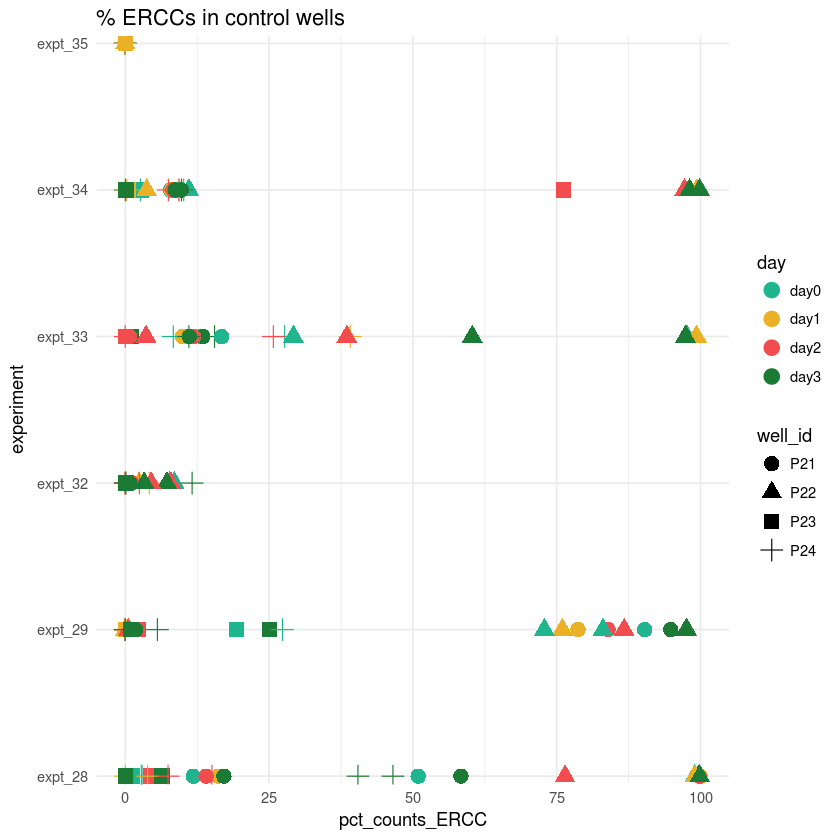

In [30]:
ggplot(as.data.frame(colData(sce)[sce$well_type == "control",]),
       aes(x = pct_counts_ERCC, y = experiment, color = day,
           shape = well_id)) +
    geom_point(size = 4) +
    scale_color_canva(palette = "Tropical tones") +
    ggtitle("% ERCCs in control wells") +
   scale_y_discrete(expand = c(0.01, 0))  + theme_minimal()


P21 and P23 are positive controls; P22 and P24 are negative controls. ERCCs in A1, P21, P22, no ERCCS in P23, P24.



In [31]:
sce$control_type <- NA
sce$control_type[sce$well_id %in% c("P21", "P23")] <- "pos_ctl"
sce$control_type[sce$well_id %in% c("P22", "P24")] <- "neg_ctl"

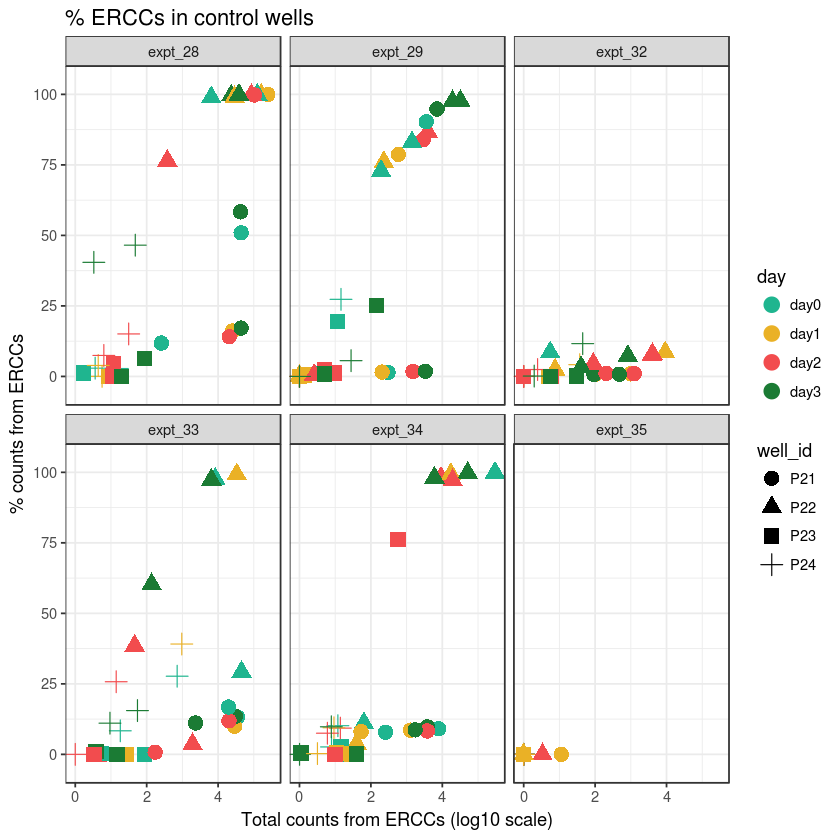

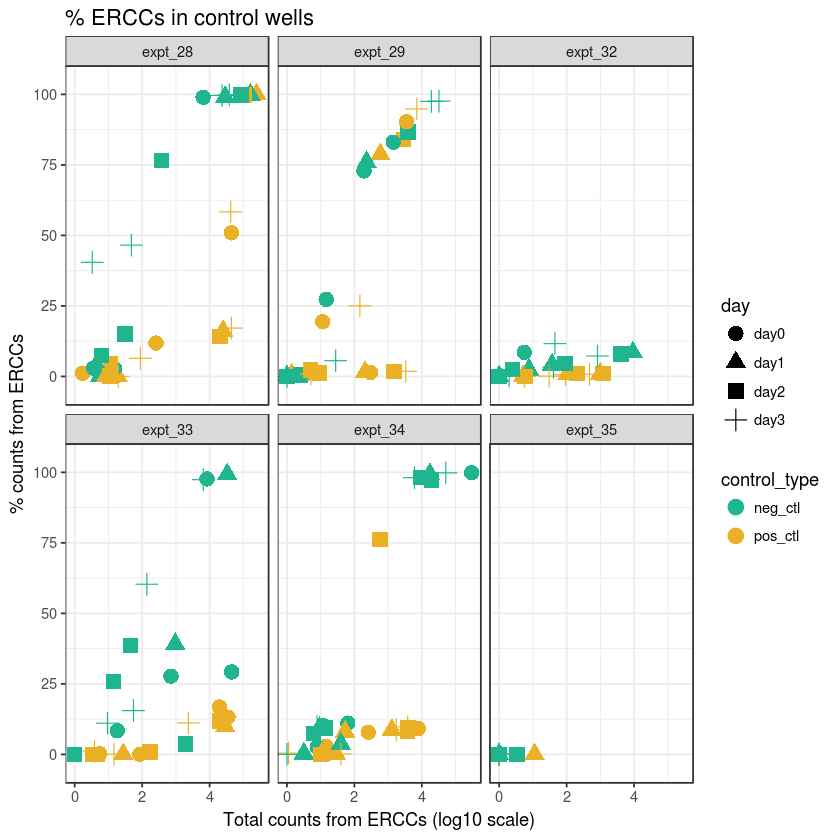

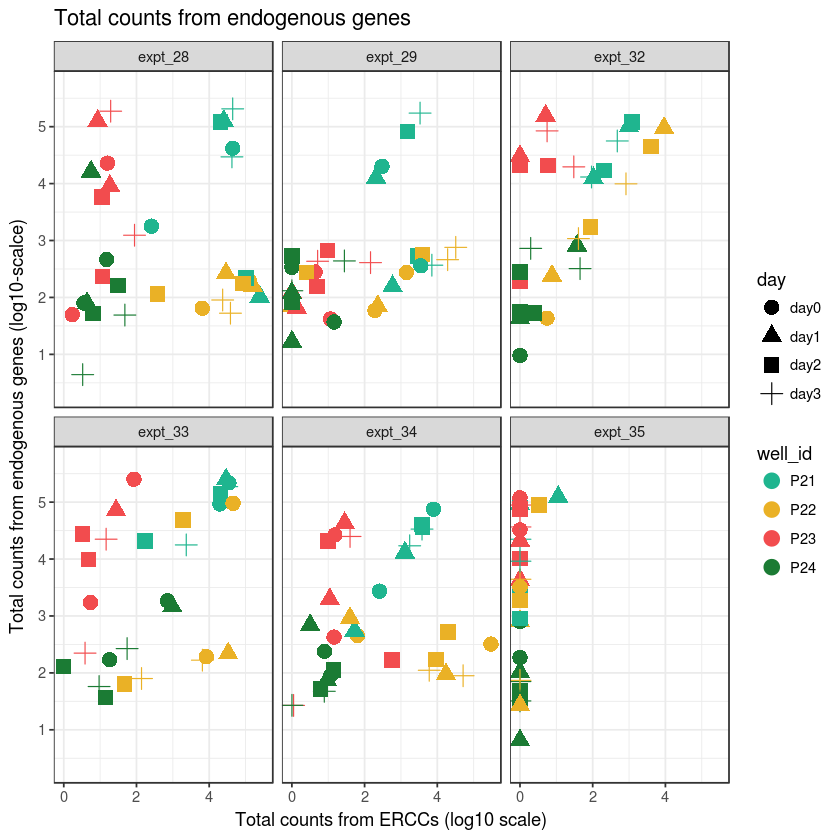

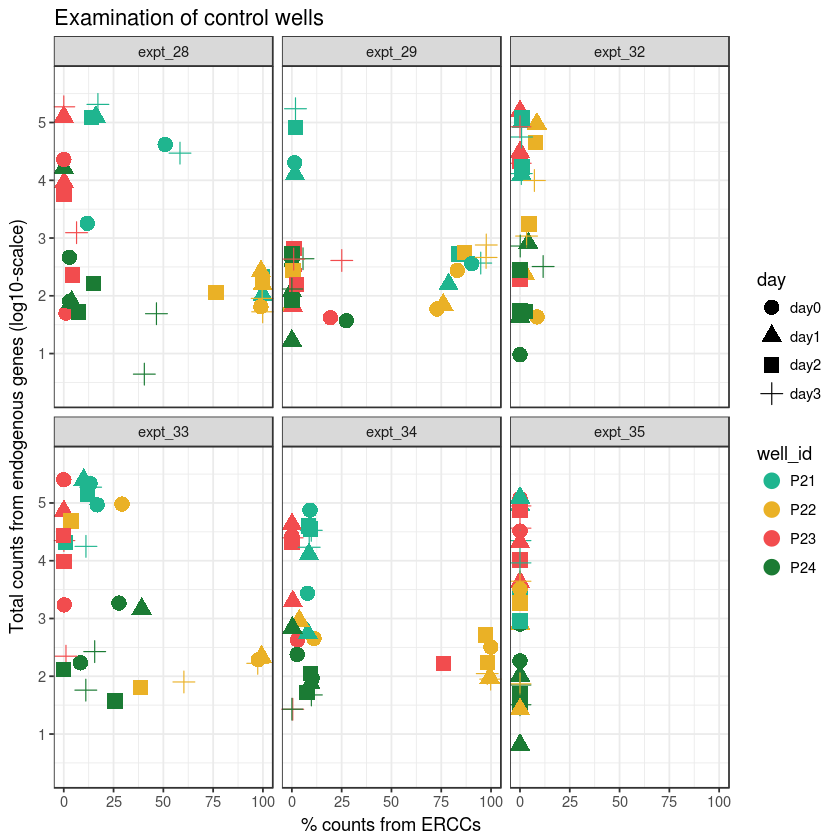

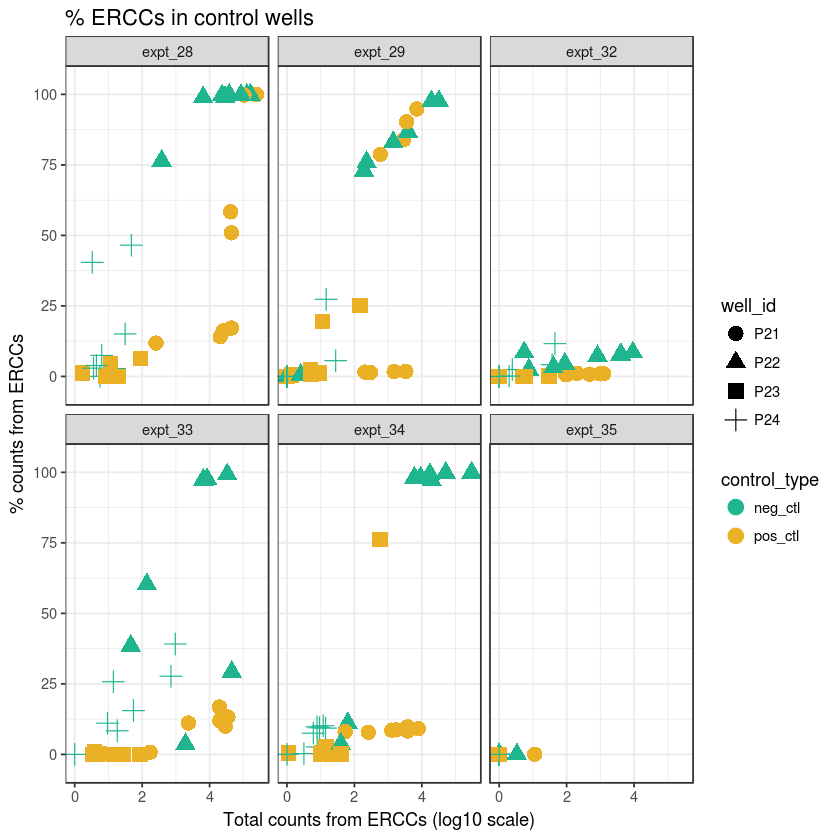

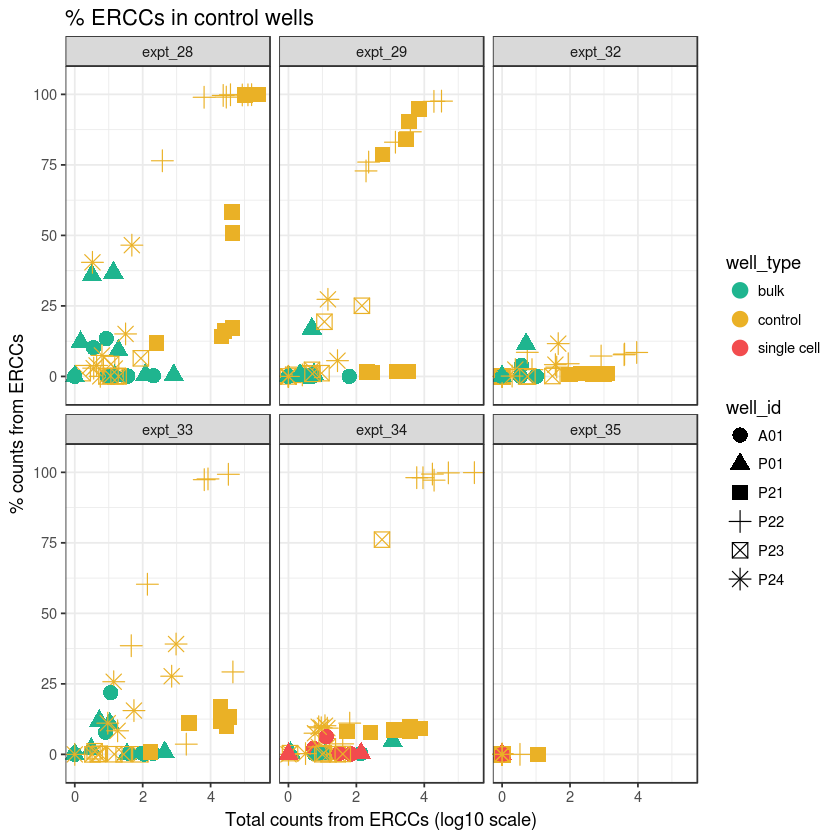

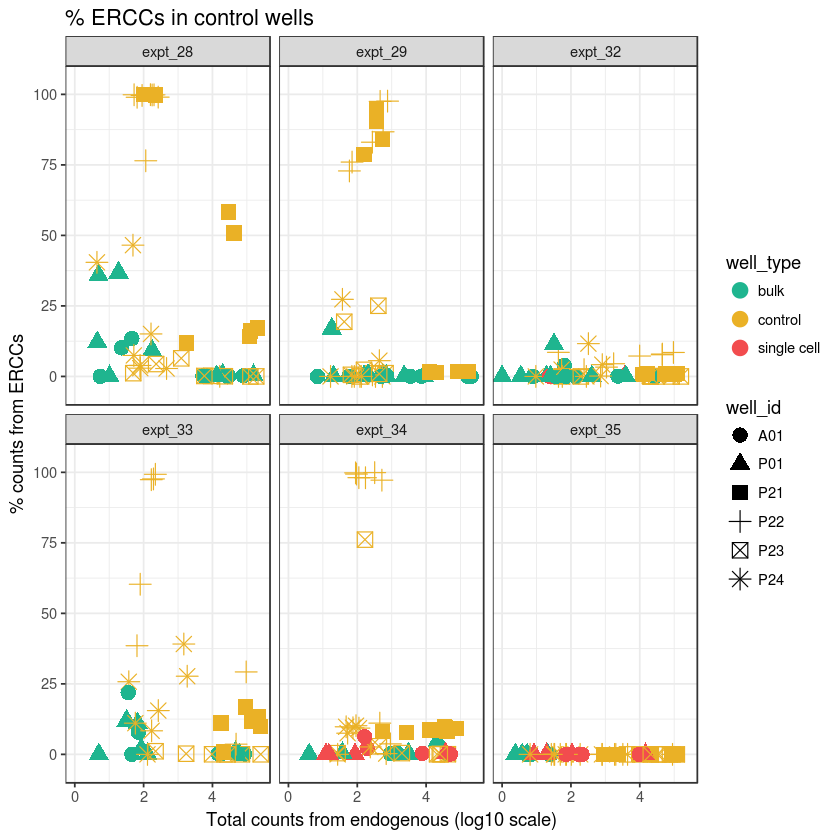

In [32]:
ggplot(as.data.frame(colData(sce))[sce$well_type == "control",],
       aes(y = pct_counts_ERCC,
           x = log10_total_counts_ERCC, color =  day, shape = well_id)) +
    geom_point(size = 4) +
    facet_wrap(~experiment) +
    scale_color_canva(palette = "Tropical tones") +
    ylab("% counts from ERCCs") + xlab("Total counts from ERCCs (log10 scale)") +
    ggtitle("% ERCCs in control wells") +
   scale_y_continuous(expand = c(0.1, 0.1))  + theme_bw()

ggplot(as.data.frame(colData(sce))[sce$well_type == "control",],
       aes(y = pct_counts_ERCC, x = log10_total_counts_ERCC,
           color =  control_type, shape = day)) +
    geom_point(size = 4) +
    facet_wrap(~experiment) +
    scale_color_canva(palette = "Tropical tones") +
    ylab("% counts from ERCCs") + xlab("Total counts from ERCCs (log10 scale)") +
    ggtitle("% ERCCs in control wells") +
   scale_y_continuous(expand = c(0.1, 0.1))  + theme_bw()

ggplot(as.data.frame(colData(sce))[sce$well_type == "control",],
       aes(y = log10_total_counts_endogenous, x = log10_total_counts_ERCC,
           color =  well_id, shape = day)) +
    geom_point(size = 4) +
    facet_wrap(~experiment) +
    scale_color_canva(palette = "Tropical tones") +
    ylab("Total counts from endogenous genes (log10-scalce)") +
    xlab("Total counts from ERCCs (log10 scale)") +
    ggtitle("Total counts from endogenous genes") +
   scale_y_continuous(expand = c(0.1, 0.1))  + theme_bw()

ggplot(as.data.frame(colData(sce))[sce$well_type == "control",],
       aes(y = log10_total_counts_endogenous, x = pct_counts_ERCC,
           color =  well_id, shape = day)) +
    geom_point(size = 4) +
    facet_wrap(~experiment) +
    scale_color_canva(palette = "Tropical tones") +
    ylab("Total counts from endogenous genes (log10-scalce)") +
    xlab("% counts from ERCCs") +
    ggtitle("Examination of control wells") +
    scale_y_continuous(expand = c(0.1, 0.1))  + theme_bw()


ggplot(as.data.frame(colData(sce))[sce$well_type == "control",],
       aes(y = pct_counts_ERCC, x = log10_total_counts_ERCC,
           color =  control_type, shape = well_id)) +
    geom_point(size = 4) +
    facet_wrap(~experiment) +
    scale_color_canva(palette = "Tropical tones") +
    ylab("% counts from ERCCs") + xlab("Total counts from ERCCs (log10 scale)") +
    ggtitle("% ERCCs in control wells") +
   scale_y_continuous(expand = c(0.1, 0.1))  + theme_bw()


ggplot(as.data.frame(colData(sce))[sce$well_id %in% c("A01", "P01", "P21", "P22", "P23", "P24"),],
       aes(y = pct_counts_ERCC, x = log10_total_counts_ERCC,
           color = well_type, shape = well_id)) +
    geom_point(size = 4) +
    facet_wrap(~experiment) +
    scale_color_canva(palette = "Tropical tones") +
    ylab("% counts from ERCCs") + xlab("Total counts from ERCCs (log10 scale)") +
    ggtitle("% ERCCs in control wells") +
   scale_y_continuous(expand = c(0.1, 0.1))  + theme_bw()


ggplot(as.data.frame(colData(sce))[sce$well_id %in% c("A01", "P01", "P21", "P22", "P23", "P24"),],
       aes(y = pct_counts_ERCC, x = log10_total_counts_endogenous, color = well_type, shape = well_id)) +
    geom_point(size = 4) +
    facet_wrap(~experiment) +
    scale_color_canva(palette = "Tropical tones") +
    ylab("% counts from ERCCs") + xlab("Total counts from endogenous (log10 scale)") +
    ggtitle("% ERCCs in control wells") +
   scale_y_continuous(expand = c(0.1, 0.1))  + theme_bw()



## Distributions of QC metrics across days



In [33]:
library(RColorBrewer)
col_list = c(brewer.pal(8,"Set1"), brewer.pal(8,"Set2"), brewer.pal(12,"Set3"), brewer.pal(12,"Paired"),
             brewer.pal(9,"Pastel1"), brewer.pal(8,"Pastel2"), brewer.pal(8,"Dark2"), brewer.pal(8,"Accent"))

Picking joint bandwidth of 0.748
Picking joint bandwidth of 0.842
Picking joint bandwidth of 1.24
Picking joint bandwidth of 1.24


Picking joint bandwidth of 0.139
Picking joint bandwidth of 0.0849
Picking joint bandwidth of 0.0721
Picking joint bandwidth of 0.131


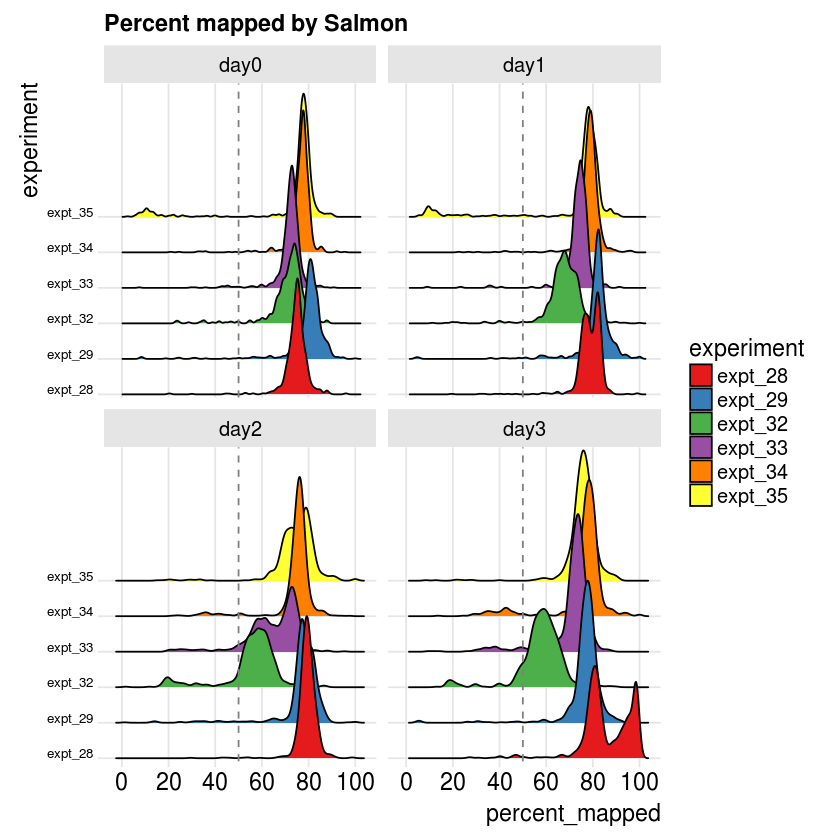

Picking joint bandwidth of 570
Picking joint bandwidth of 400
Picking joint bandwidth of 351
Picking joint bandwidth of 463


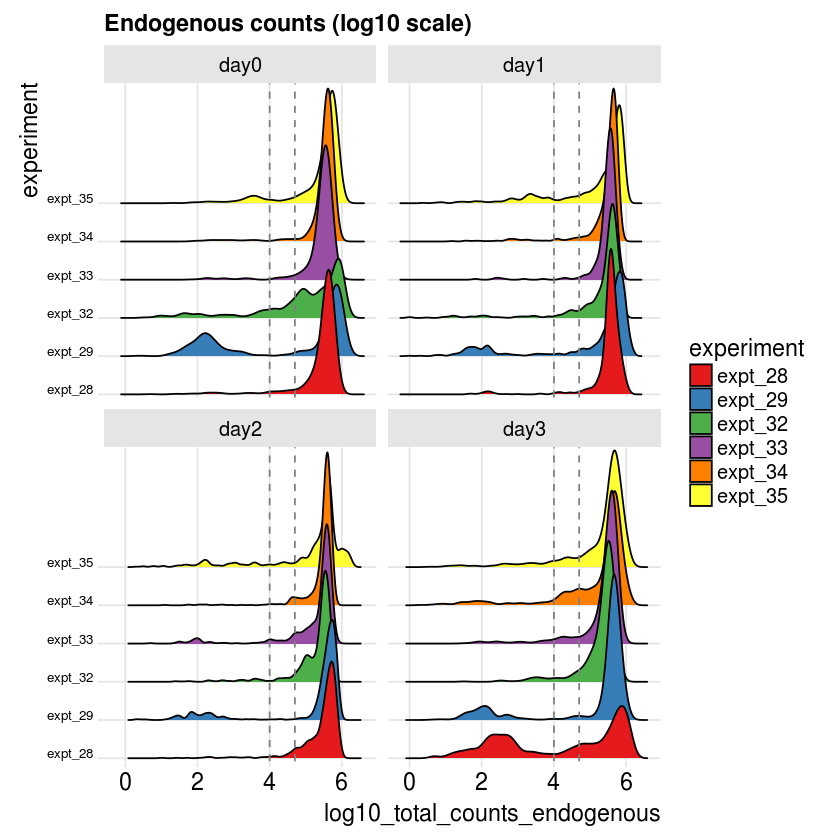

Picking joint bandwidth of 0.287
Picking joint bandwidth of 0.264
Picking joint bandwidth of 0.509
Picking joint bandwidth of 1.96


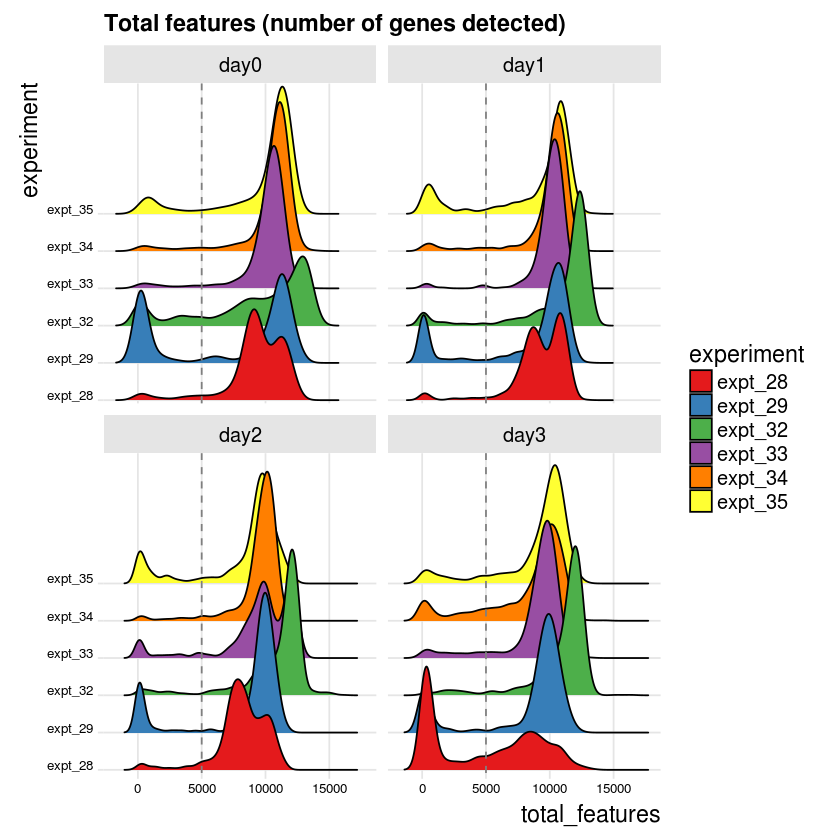

Picking joint bandwidth of 0.0988
Picking joint bandwidth of 0.0776
Picking joint bandwidth of 0.0939
Picking joint bandwidth of 0.0871


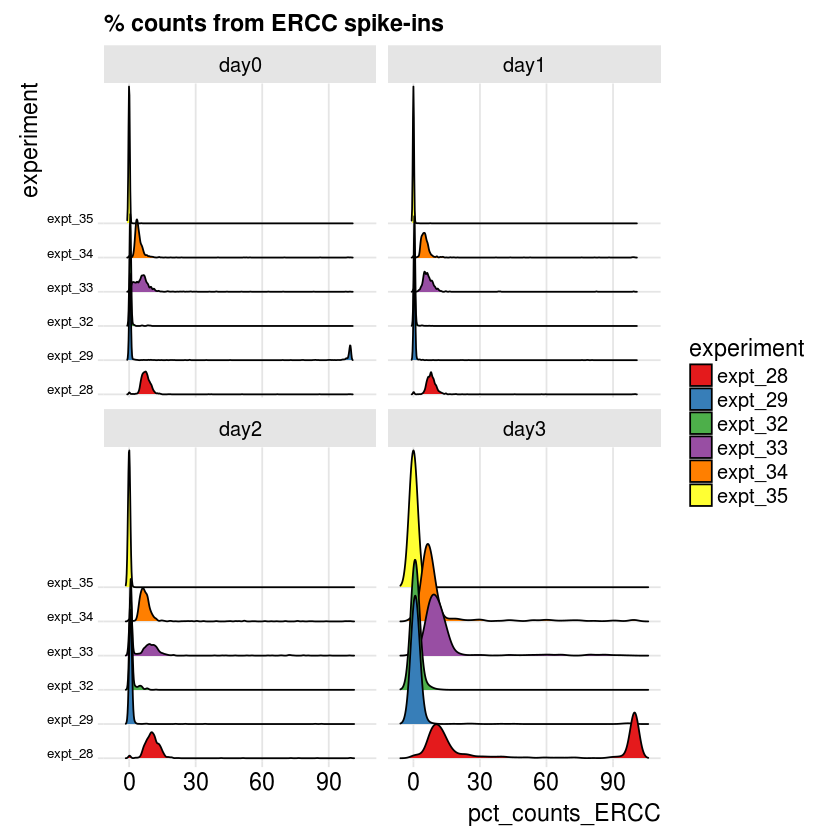

Picking joint bandwidth of 0.539
Picking joint bandwidth of 0.471
Picking joint bandwidth of 0.441
Picking joint bandwidth of 0.488


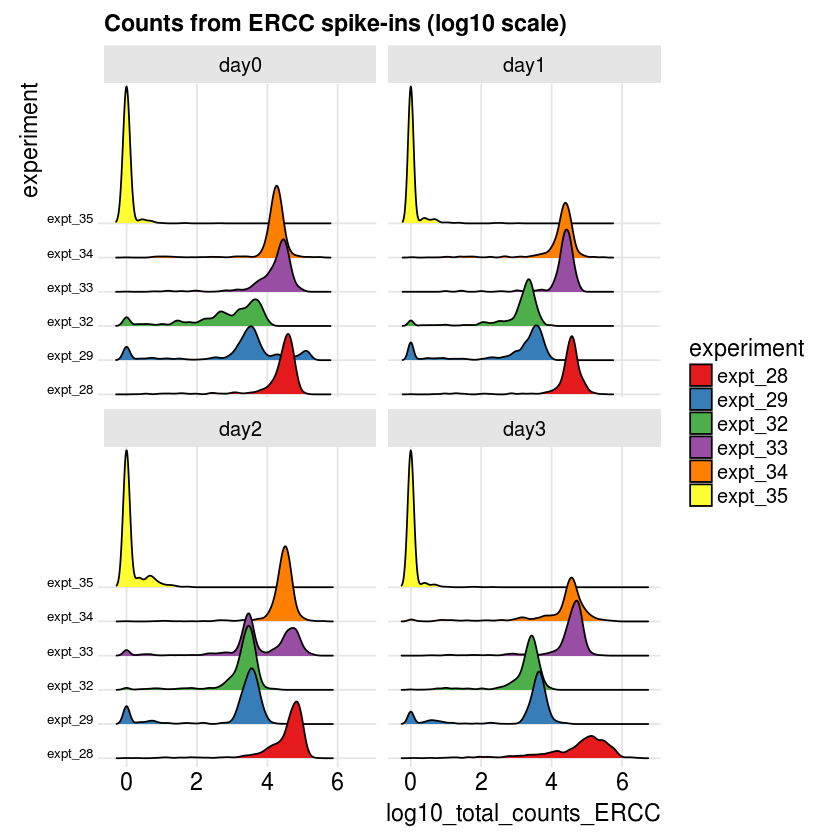

Picking joint bandwidth of 1.85
Picking joint bandwidth of 0.957
Picking joint bandwidth of 0.864
Picking joint bandwidth of 1.86


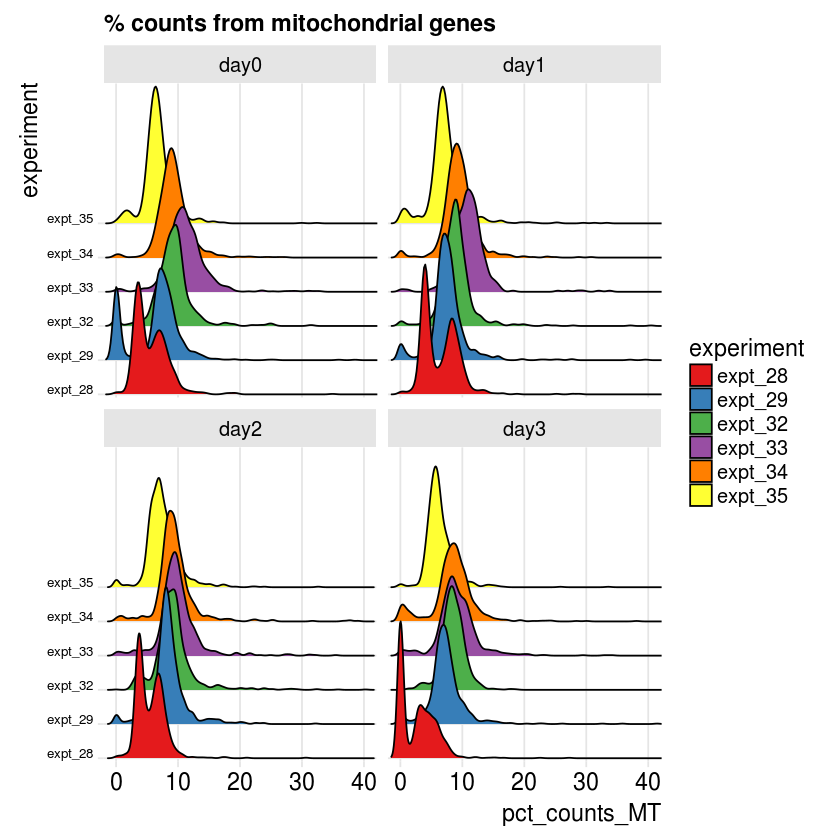

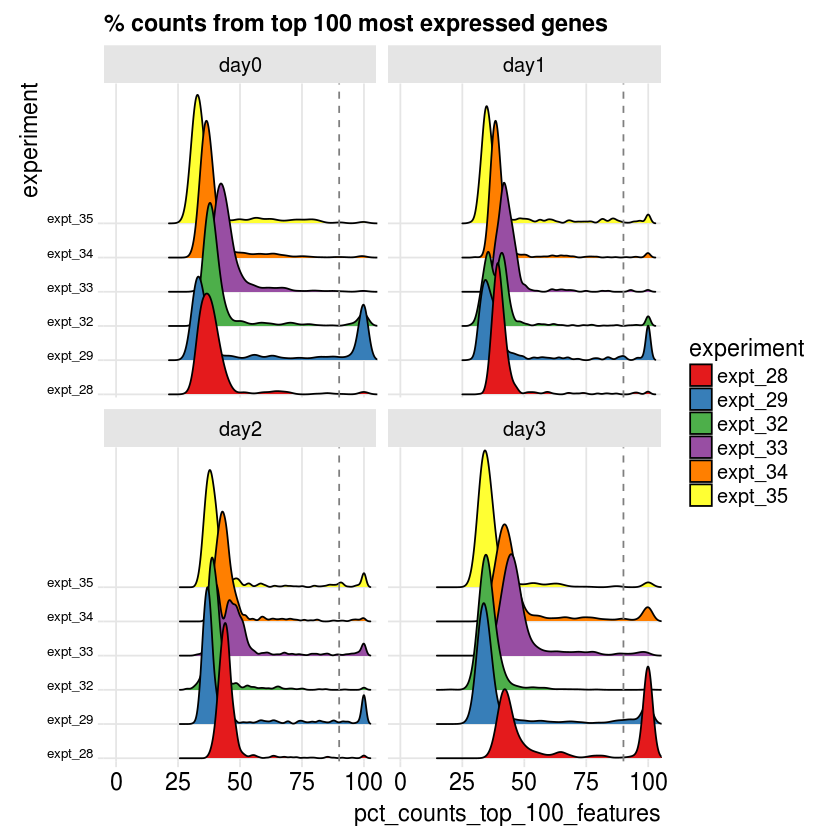

In [34]:
ggplot(as.data.frame(colData(sce)), aes(x = percent_mapped, y = experiment,
                         fill =  experiment)) +
    geom_density_ridges(scale = 4) + 
    geom_vline(xintercept = 50, linetype = 2, colour = "gray50") +
    facet_wrap(~day) + scale_fill_manual(values = col_list) +
    ggtitle("Percent mapped by Salmon") +
    scale_x_continuous(breaks = c(0, 20, 40, 60, 80, 100)) +
    scale_y_discrete(expand = c(0.01, 0))   + # will generally have to set the `expand` option
    theme_ridges() + theme(axis.text.y = element_text(size = 8))

ggplot(as.data.frame(colData(sce)), aes(x = log10_total_counts_endogenous, y = experiment,
                         fill =  experiment)) +
    geom_density_ridges(scale = 4) +
    geom_vline(xintercept = c(4, log10(50000)), linetype = 2, colour = "gray50") +
    facet_wrap(~day) + scale_fill_manual(values = col_list) +
    ggtitle("Endogenous counts (log10 scale)") +
    scale_y_discrete(expand = c(0.01, 0))  +  # will generally have to set the `expand` option
    theme_ridges() + theme(axis.text.y = element_text(size = 8))
#   scale_x_continuous(expand = c(0, 0))


ggplot(as.data.frame(colData(sce)), aes(x = total_features, y = experiment, fill =  experiment)) +
    geom_density_ridges(scale = 4) + 
    geom_vline(xintercept = 5000, linetype = 2, colour = "gray50") +
    facet_wrap(~day) + scale_fill_manual(values = col_list) +
    ggtitle("Total features (number of genes detected)") +
    scale_y_discrete(expand = c(0.01, 0))  +  # will generally have to set the `expand` option
    theme_ridges() + theme(axis.text.y = element_text(size = 8), axis.text.x = element_text(size = 8))
#   scale_x_continuous(expand = c(0, 0))

ggplot(as.data.frame(colData(sce)),
       aes(x = pct_counts_ERCC, y = experiment, fill =  experiment)) +
    geom_density_ridges(scale = 4) + 
    #geom_vline(xintercept = 2500, linetype = 2, colour = "gray50") +
    facet_wrap(~day) + scale_fill_manual(values = col_list) +
    ggtitle("% counts from ERCC spike-ins") +
    scale_y_discrete(expand = c(0.01, 0))   + # will generally have to set the `expand` option
    theme_ridges() + theme(axis.text.y = element_text(size = 8))
#   scale_x_continuous(expand = c(0, 0))

ggplot(as.data.frame(colData(sce)), aes(x = log10_total_counts_ERCC,
                                        y = experiment, fill =  experiment)) +
    geom_density_ridges(scale = 4) + 
    #geom_vline(xintercept = 2500, linetype = 2, colour = "gray50") +
    facet_wrap(~day) + scale_fill_manual(values = col_list)  +
    ggtitle("Counts from ERCC spike-ins (log10 scale)" ) +
    scale_y_discrete(expand = c(0.01, 0))  + # will generally have to set the `expand` option
    theme_ridges() + theme(axis.text.y = element_text(size = 8))
#   scale_x_continuous(expand = c(0, 0))

ggplot(as.data.frame(colData(sce)), aes(x = pct_counts_MT,
                                        y = experiment, fill = experiment)) +
    geom_density_ridges(scale = 4) +
    #geom_vline(xintercept = 2500, linetype = 2, colour = "gray50") +
    facet_wrap(~day) + scale_fill_manual(values = col_list) +
    ggtitle("% counts from mitochondrial genes") +
    coord_cartesian(xlim = c(0, 40)) +
    scale_y_discrete(expand = c(0.01, 0)) +   # will generally have to set the `expand` option
    theme_ridges() + theme(axis.text.y = element_text(size = 8))
#   scale_x_continuous(expand = c(0, 0))


ggplot(as.data.frame(colData(sce)), aes(x = pct_counts_top_100_features,
                                        y = experiment, fill = experiment)) +
    geom_density_ridges(scale = 4) + 
    geom_vline(xintercept = 90, linetype = 2, colour = "gray50") +
    facet_wrap(~day) + scale_fill_manual(values = col_list) +
    ggtitle("% counts from top 100 most expressed genes") +
    coord_cartesian(xlim = c(0, 100)) +
    scale_y_discrete(expand = c(0.01, 0)) +   # will generally have to set the `expand` option
    theme_ridges() + theme(axis.text.y = element_text(size = 8))



## Endogenous counts against total counts



In [35]:
length( unique(sce$experiment))
expt_list <- unique(sce$experiment)

[1] 6

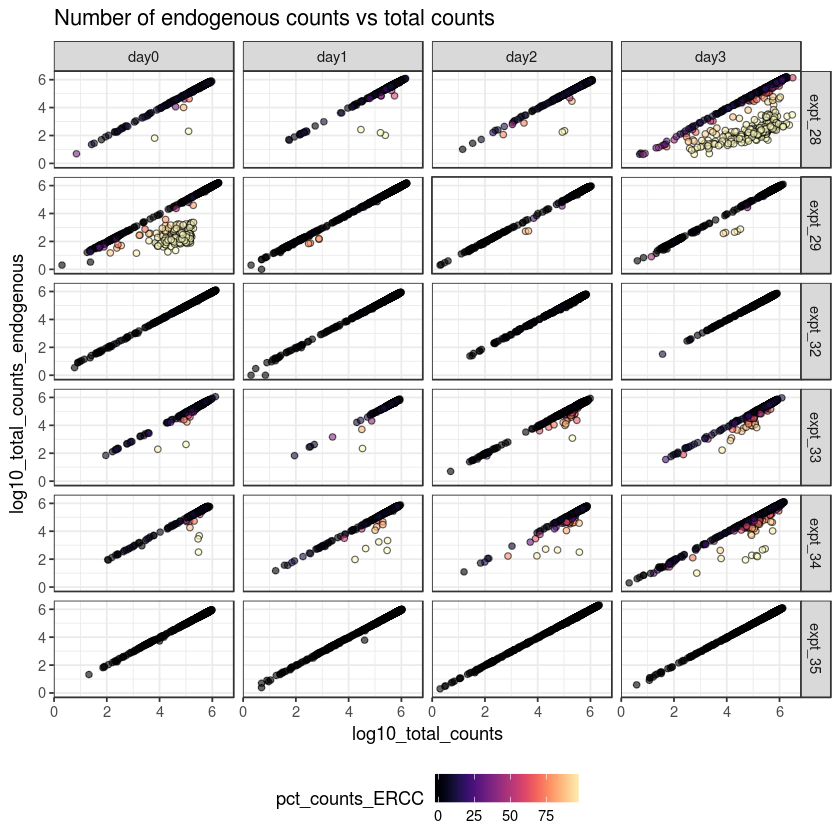

In [36]:
ggplot(as.data.frame(colData(sce)),
       aes(x = log10_total_counts, y = log10_total_counts_endogenous,
           fill =  pct_counts_ERCC)) +
     geom_point(shape = 21, alpha= 0.6) +
     scale_fill_viridis(option = 'magma') +
     facet_grid(experiment ~ day) + ggtitle("Number of endogenous counts vs total counts") +
     theme_bw() + theme(legend.position = "bottom")


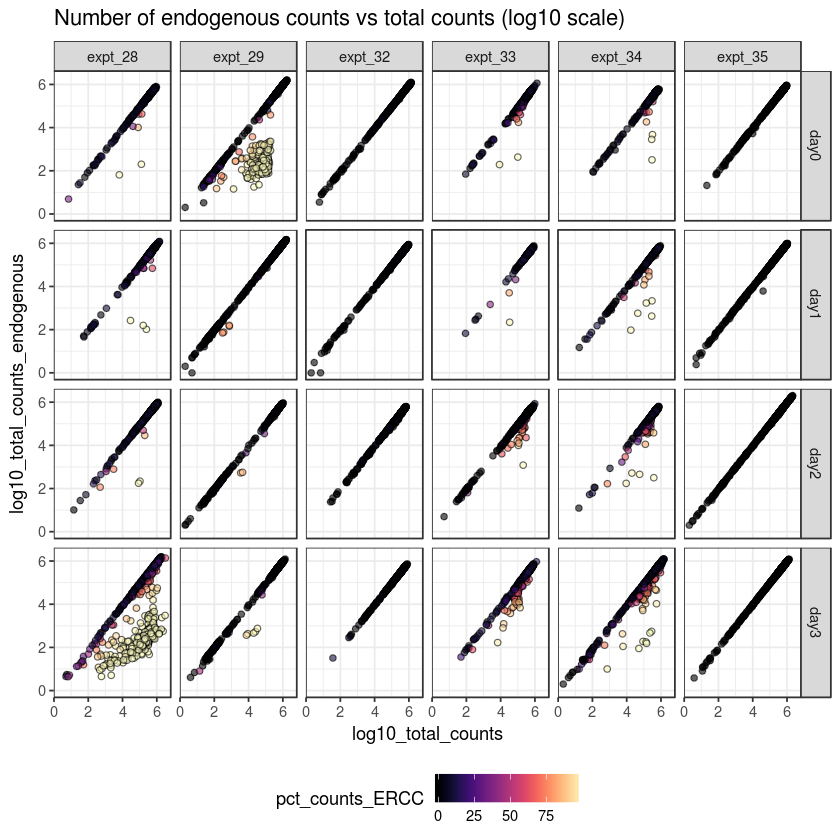

In [37]:
ggplot(as.data.frame(colData(sce)),
       aes(x = log10_total_counts, y = log10_total_counts_endogenous,
           fill =  pct_counts_ERCC)) +
     geom_point(shape = 21, alpha= 0.6) +
     scale_fill_viridis(option = 'magma') +
     facet_grid(day ~ experiment) + ggtitle("Number of endogenous counts vs total counts (log10 scale)") +
     theme_bw() + theme(legend.position = "bottom")


## Percent of reads mapped vs total counts

Plot number of expressed features against total counts, with cells coloured by
different QC metrics:



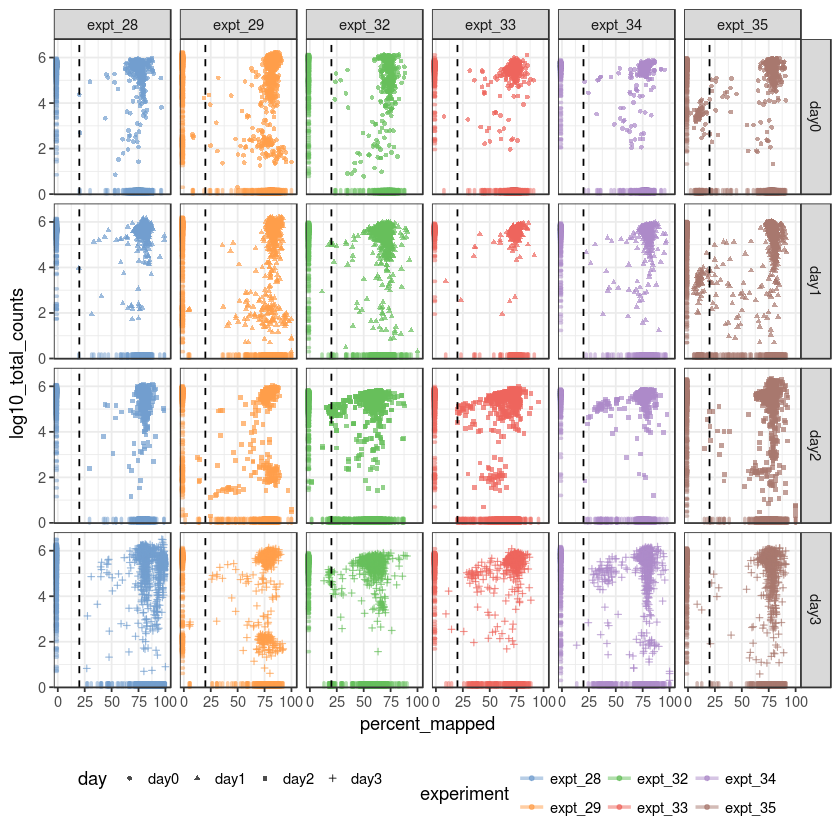

In [38]:
p1 <- plotPhenoData(sce, aes(x = percent_mapped, y = log10_total_counts,
              colour = experiment, shape = day)) +
theme(legend.position = "bottom") +
geom_vline(xintercept = 20, linetype = 2) +
facet_grid(day ~ experiment)
p1 + theme_bw() + theme(legend.position = "bottom")

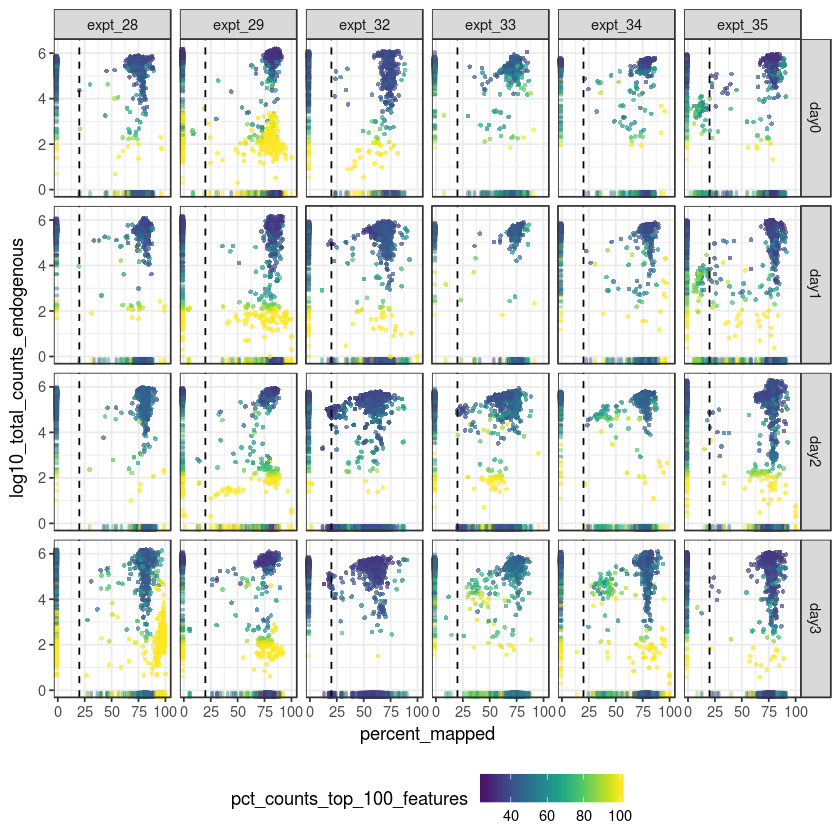

In [39]:
plotPhenoData(sce, aes(x = percent_mapped, y = log10_total_counts_endogenous,
                  colour = pct_counts_top_100_features)) +
    theme(legend.position = "bottom") +
    geom_vline(xintercept = 20, linetype = 2) +
    facet_grid(day ~ experiment) + theme_bw() + theme(legend.position = "bottom")


## Expressed genes vs total counts

Plot number of expressed features against total counts, with cells coloured by
different QC metrics:



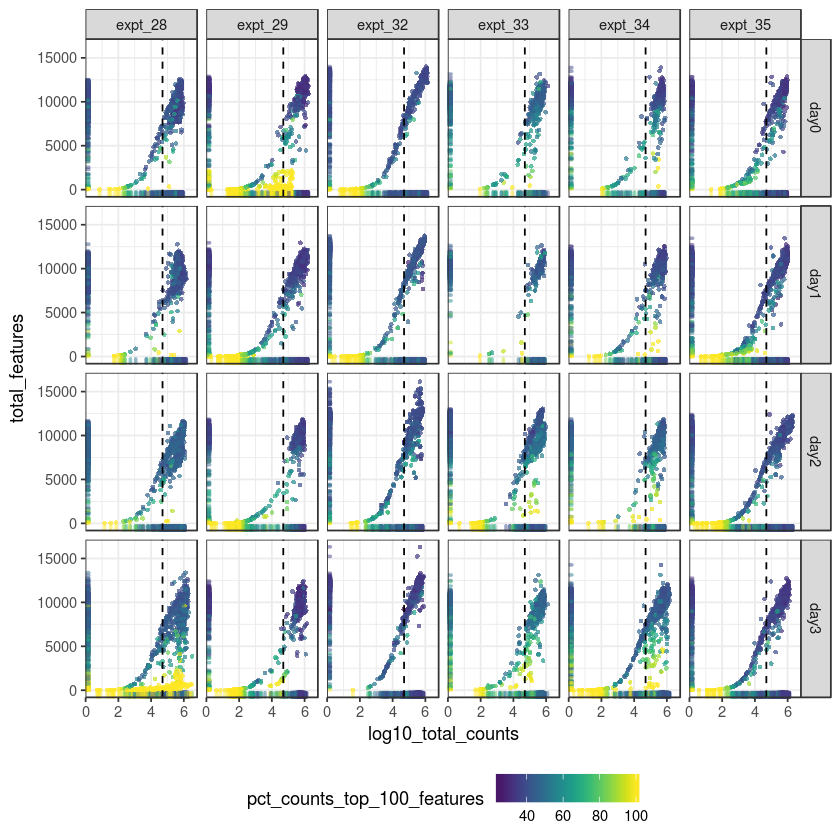

In [40]:
plotPhenoData(sce, aes(x = log10_total_counts, y = total_features,
                  colour =  pct_counts_top_100_features)) +
    facet_grid(day ~ experiment) +
    geom_vline(xintercept = log10(50000), linetype = 2) + theme_bw() +
    theme(legend.position = "bottom")


## Expressed genes vs endogenous counts

Plot number of expressed features against total counts, with cells coloured by
different QC metrics:



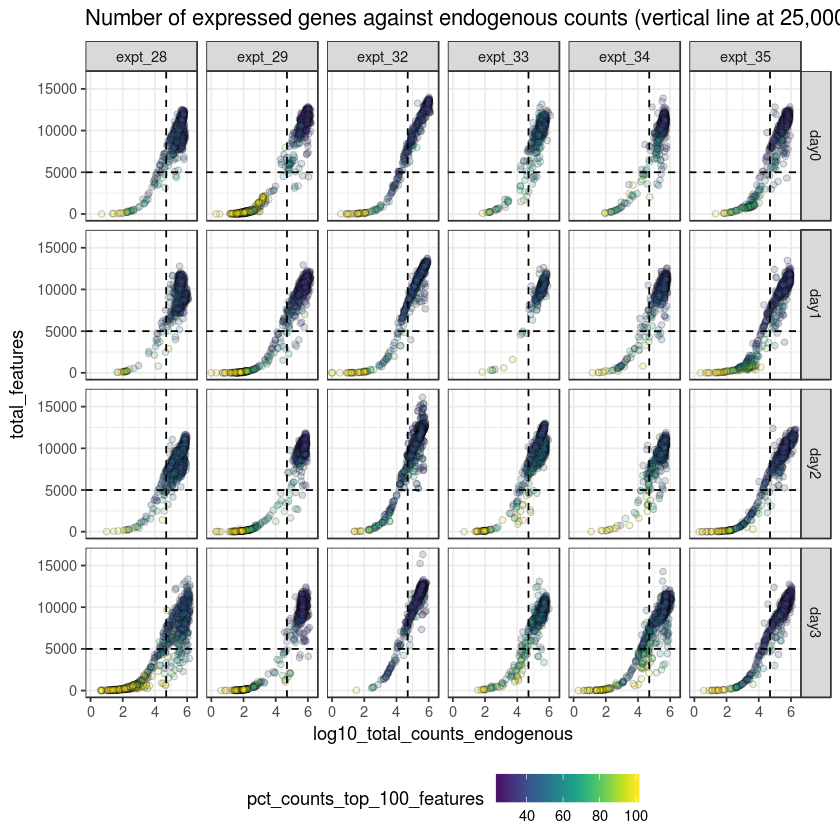

In [41]:
ggplot(as.data.frame(colData(sce)),
       aes(x = log10_total_counts_endogenous, y = total_features,
                  fill =  pct_counts_top_100_features)) +
    geom_point(alpha = 0.2, shape = 21) +
    scale_fill_viridis() +
    facet_grid(day ~ experiment) +
    ggtitle("Number of expressed genes against endogenous counts (vertical line at 25,000 endogenous counts)") +
    theme(legend.position = "bottom") +
    geom_hline(yintercept = 5000, linetype = 2) +
    geom_vline(xintercept = log10(50000), linetype = 2) + theme_bw() + theme(legend.position = "bottom")


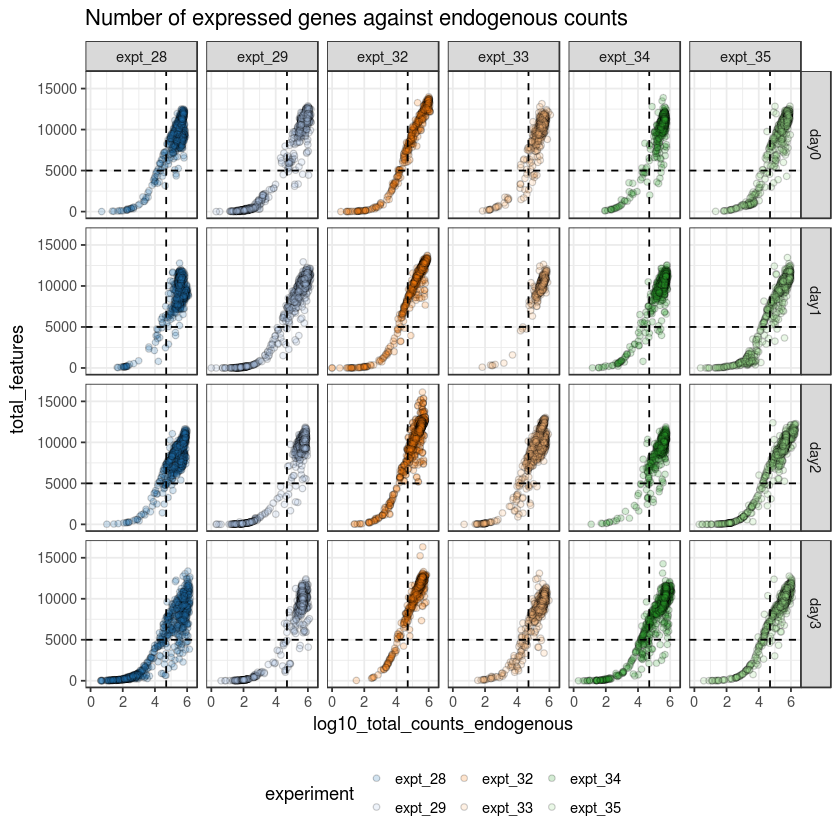

In [42]:
ggplot(as.data.frame(colData(sce)),
       aes(x = log10_total_counts_endogenous, y = total_features,
           fill =  experiment)) +
    geom_point(alpha = 0.2, shape = 21) +
    scale_fill_tableau(palette = "tableau20") +
    facet_grid(day ~ experiment) + ggtitle("Number of expressed genes against endogenous counts") +
    theme(legend.position = "bottom") +
    geom_hline(yintercept = 5000, linetype = 2) +
    geom_vline(xintercept = log10(50000), linetype = 2) + theme_bw() + theme(legend.position = "bottom")



## Cumulative Expression Plots

The cumulative expression plot (with cells coloured by total number of
genes from endogenous genes) shows a handful of low complexity
libraries and otherwise a range of library complexities associated
with the percentage of expression accounted for by feature controls.



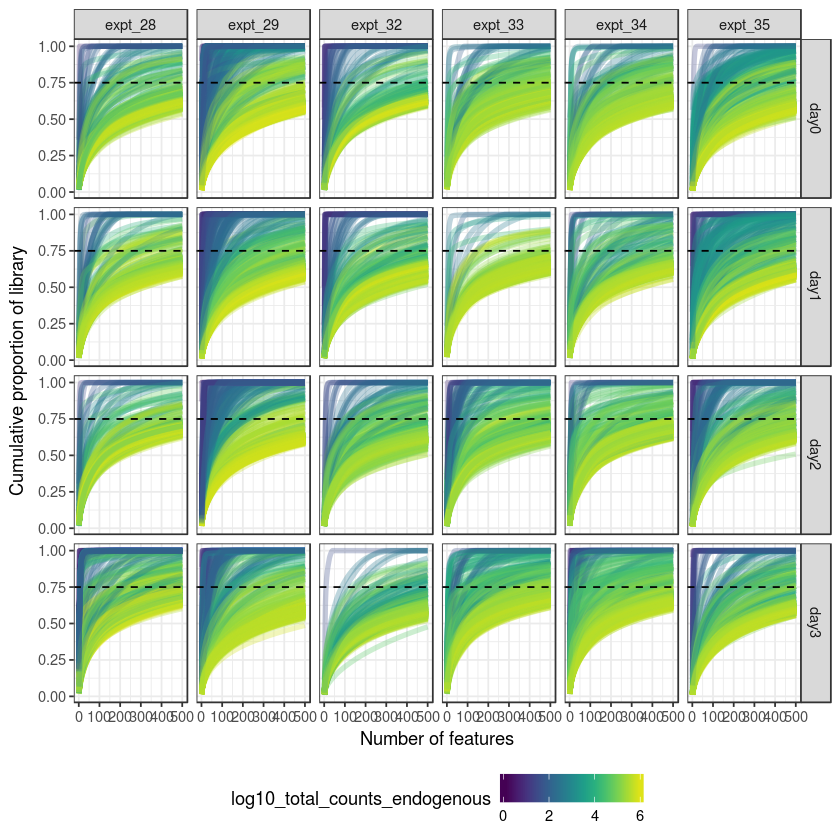

In [43]:
plotScater(sce, exprs_values = "counts", block1 = "experiment", block2 = "day",
           colour_by = "log10_total_counts_endogenous") +
    geom_hline(yintercept = 0.75, linetype = 2) +
    theme_bw() + theme(legend.position = "bottom")


## Most expressed genes

Plot the most expressed genes across each dataset. We have already filtered out ERCC spike-in genes, which have very high expression in the 12 plates from Expt 19, Expt 21 and Expt 22. Many MT and ribosomal genes appear, along with *ACTB* and *GAPDH*, as expected.



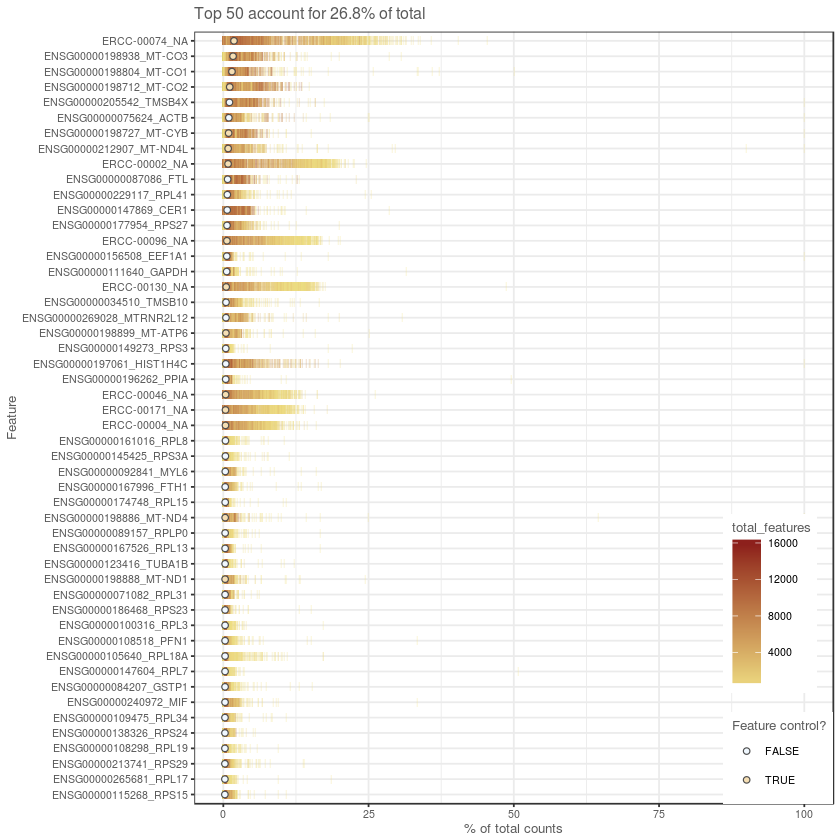

In [44]:
plotQC(sce)


## PCA on QC metrics with outlier detection

Another option available in `scater` is to conduct PCA on a set of QC metrics.
The advantage of doing this is that the QC metrics focus on technical aspects of
the libraries that are likely to distinguish problematics cells. Automatic
outlier detection on PCA plots using QC metrics is available to help identify
potentially problematic cells.

We use the following metrics for PCA-based outlier detection:

* `pct_counts_top_100_features`
* `total_features`
* `pct_counts_feature_controls_MT`
* `pct_counts_feature_controls_ERCC`
* `n_detected_feature_controls`
* `log10_counts_endogenous_features`
* `log10_counts_feature_controls`

A particular set of variables to be used can be specified with the
`selected_variables` argument as shown in the example below.



In [45]:
#names(colData(sce))


In this case, the automatic outlier detection does not successfully identify as outliers those cells that we would want to filter out, so we will not use these outliers in the QC filtering steps below.



The following selected_variables were not found in colData(object): pct_counts_feature_controlsThe following selected_variables were not found in colData(object): total_features_feature_controlsThe following selected_variables were not found in colData(object): log10_total_counts_feature_controls
Other variables from colData(object) can be used by specifying a vector of variable names as the selected_variables argument.
PCA is being conducted using the following variables:pct_counts_top_100_featurestotal_featureslog10_total_counts_endogenous


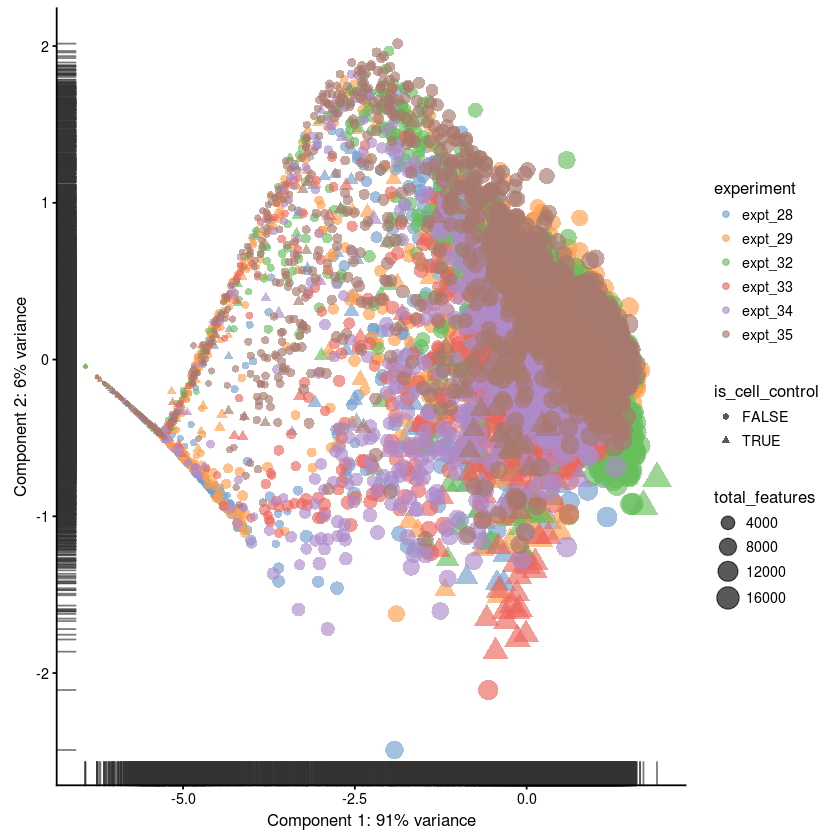

In [46]:
plotPCA(sce, size_by = "total_features", colour_by = "experiment",
        pca_data_input = "pdata", detect_outliers = FALSE)


The cells identified as outliers by the automatic outlier detection method here look like a subset of those that we would like to filter out on the basis of using multiple QC metrics simultaneously.

# Filter cells

Now we will proceed to filtering out potentially problematic cells. We apply the following criteria for filtering:

STRICT:
* total counts from endogenous features > 50,000
* total features > 5000 (and we also allow filter cells more than one MAD from the median for `total_features` in case that capture more cells)
* % counts from top 100 most expressed features < 90%
* % counts from MT genes < 15%
* mapping rate > 60%


We would usually also use the following criteria, but these are distorted by the enormous proportions of ERCC counts for Expt 19, Expt 21 and Expt 22:
* % counts from ERCC < 10%

We do not filter out cells identified as outlers by the automatic outlier detection method above, but do remove the mixed bulk, bulk and control wells from consideration too.

We also filter out cells for which the donor cell line remains "unknown".



In [47]:
sce

class: SingleCellExperiment 
dim: 25489 18038 
metadata(0):
assays(2): tpm counts
rownames(25489): ENSG00000000003_TSPAN6 ENSG00000000005_TNMD ...
  ERCC-00170_NA ERCC-00171_NA
rowData names(52): exprs_collapsed_to ensembl_transcript_id ...
  log10_total_counts_control pct_counts_control
colnames(18038): 22606_2#1 22606_2#10 ... 24539_8#98 24539_8#99
colData names(121): salmon_version samp_type ...
  is_cell_control_control control_type
reducedDimNames(0):
spikeNames(0):

In [48]:
sce <- sce[!grepl("^ERCC", rownames(sce)),]

In [49]:
table(sce$experiment, sce$day)

         
          day0 day1 day2 day3
  expt_28  768  768  768  768
  expt_29  766  766  766  767
  expt_32  384  768 1152  768
  expt_33  768  384  768  768
  expt_34  768  768  768  766
  expt_35  768  768  767  768

In [50]:
head(sce$percent_mapped)

[1] 81.43574 81.15918 74.58264 77.82666 81.52340 82.25114

In [10]:
cell_filter_strict <- (sce$total_counts_endogenous > 50000 &
                           sce$total_features > 5000 &
#                             sce$pct_counts_feature_controls_ERCC < 10,
                           sce$pct_counts_MT < 15 &
                           sce$pct_counts_top_100_features < 90 &
                           sce$percent_mapped > 60 &
#                            !outlier,
                          sce$donor != "unknown" &
                           sce$donor != "mixed_bulk" &
                           sce$well_type != "bulk" &
                           sce$well_type != "control" &
                           sce$well_type != "empty" &
                           !isOutlier(sce$total_features, 1, type = "lower"))


Drop plates that do not have at least 50 QC-passing cells.



In [11]:
# sce_filt = sce[,cell_filter_strict]
# ncol(sce_filt[,sce_filt$donor != "unknown"])
# ncol(sce_filt)

[1] 12379

[1] 12387

In [52]:
qc_pass_per_plate <- table(sce$plate_id[sce$cell_filter])
drop_plate <- names(qc_pass_per_plate)[qc_pass_per_plate < 50]
cell_filter_strict[sce$plate_id %in% drop_plate] <- FALSE
sce$cell_filter <- cell_filter_strict


`r sum(cell_filter_strict)` cells pass this relatively strict QC
procedure. That means that `r round(mean(cell_filter_strict) * 100)`
of cells overall pass QC.



In [53]:
sum(cell_filter_strict)
mean(cell_filter_strict) * 100

[1] 12206

[1] 67.66826


The table below shows the number of QC-passing cells per experiment and day.



In [54]:
knitr::kable(table(sce$experiment[sce$cell_filter], sce$day[sce$cell_filter]))



|        | day0| day1| day2| day3|
|:-------|----:|----:|----:|----:|
|expt_28 |  626|  573|  356|  208|
|expt_29 |  449|  536|  590|  567|
|expt_32 |  257|  618|  340|  262|
|expt_33 |  638|  342|  459|  606|
|expt_34 |  677|  668|  647|  504|
|expt_35 |  612|  545|  539|  587|

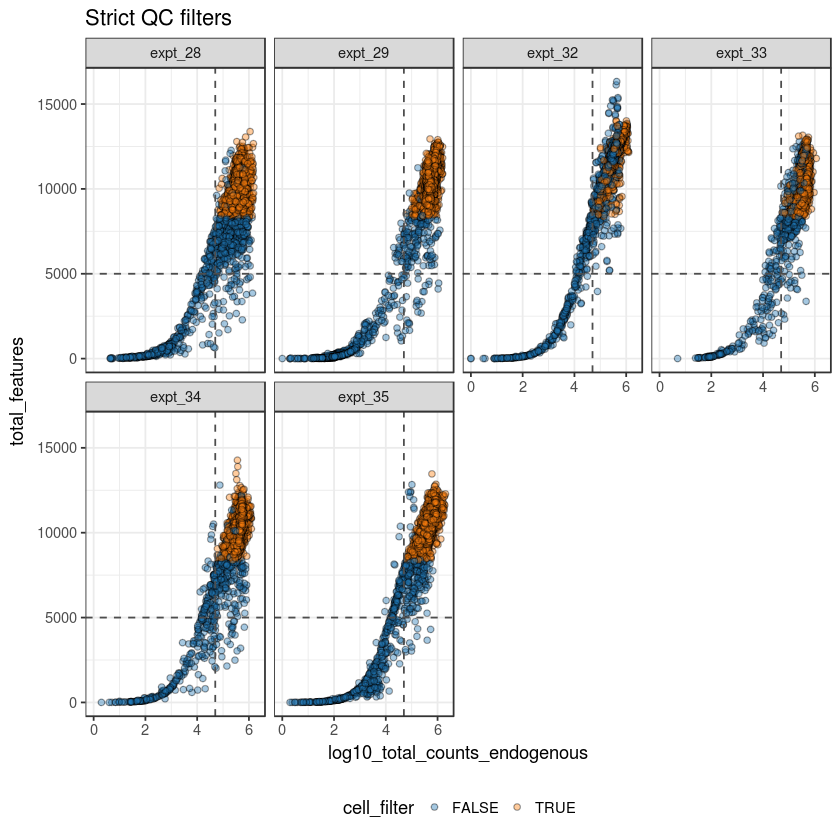

In [55]:
ggplot(as.data.frame(colData(sce)),
       aes(x = log10_total_counts_endogenous, y = total_features,
           fill =  cell_filter)) +
     geom_point(shape = 21, alpha= 0.4) +
     scale_fill_tableau() +
     facet_wrap(~experiment, ncol = 4) + ggtitle("Strict QC filters") +
    geom_hline(yintercept = 5000, linetype = 2, colour = "gray30") +
    geom_vline(xintercept = log10(50000), linetype = 2, colour = "gray30") +
     theme_bw() + theme(legend.position = "bottom")


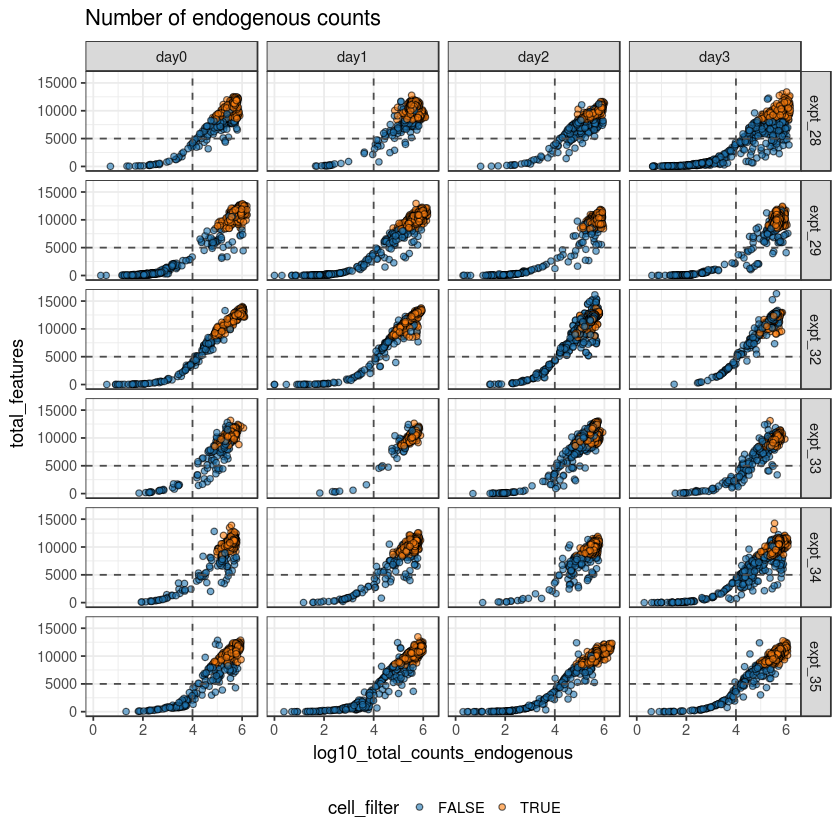

In [56]:
ggplot(as.data.frame(colData(sce)),
       aes(x = log10_total_counts_endogenous, y = total_features,
           fill =  cell_filter)) +
    geom_point(shape = 21, alpha= 0.6) +
    scale_fill_tableau() +
    facet_grid(experiment ~ day) + ggtitle("Number of endogenous counts") +
    geom_hline(yintercept = 5000, linetype = 2, colour = "gray30") +
    geom_vline(xintercept = 4, linetype = 2, colour = "gray30") +
    theme_bw() + theme(legend.position = "bottom")


In [57]:
sce_filt <- sce[, sce$cell_filter]
dim(sce_filt)

[1] 25400 12206

In [58]:
#mem_used()

In [59]:
#object_size(sce_filt)


After this filtering we retain **10,639** cells for downstream analysis.




In [60]:
sce = sce[,!(is.na(sce$day))]

In [61]:
fall <- as.data.frame(table(sce$day, sce$experiment))$Freq
ffilt <- as.data.frame(table(sce_filt$day, sce_filt$experiment))$Freq
matrix(100 * ffilt / fall, nrow = length(unique(sce_filt$day)),
       dimnames = list(sort(unique(sce_filt$day)), sort(unique(sce_filt$experiment)))) %>%  kable



|     |  expt_28|  expt_29|  expt_32|  expt_33|  expt_34|  expt_35|
|:----|--------:|--------:|--------:|--------:|--------:|--------:|
|day0 | 81.51042| 58.61619| 66.92708| 83.07292| 88.15104| 79.68750|
|day1 | 74.60938| 69.97389| 80.46875| 89.06250| 86.97917| 70.96354|
|day2 | 46.35417| 77.02350| 29.51389| 59.76562| 84.24479| 70.27379|
|day3 | 27.08333| 73.92438| 34.11458| 78.90625| 65.79634| 76.43229|


Table showing number of cells with "unknown" donor:



In [62]:
table(sce$donor == "unknown", sce$experiment) %>% kable



|      | expt_28| expt_29| expt_32| expt_33| expt_34| expt_35|
|:-----|-------:|-------:|-------:|-------:|-------:|-------:|
|FALSE |    2707|    2453|    2843|    2578|    2933|    2780|
|TRUE  |     365|     612|     229|     110|     137|     291|


Table showing number of cells with more than 50,000 endogenous counts,
by experiment:



In [63]:
table(sce$total_counts_endogenous > 50000, sce$experiment) %>% kable



|      | expt_28| expt_29| expt_32| expt_33| expt_34| expt_35|
|:-----|-------:|-------:|-------:|-------:|-------:|-------:|
|FALSE |     529|     714|     375|     220|     301|     542|
|TRUE  |    2543|    2351|    2697|    2468|    2769|    2529|




Overall QC pass rate for cells:



In [64]:
100 * ncol(sce_filt) / ncol(sce)

[1] 67.66826


We are able to retain a little over 11000 cells for downstream analysis.

# Check donors

## After QC



In [65]:
tb <- table(sce_filt$donor, sce_filt$day)


There are `r length(unique(sce$donor[sce$cell_filter]))` donors that
have at least one QC-passing cell.

`r sum(table(sce$donor[sce$cell_filter]) >= 15)` donors have at least
15 QC-passing cells aggregated across all days.

`r nrow(tb[rowSums(tb) < 100,])` donors with at least 100 QC-passing
cells aggregated across all days.

All donors used:



In [66]:
length(unique(sce$donor[sce$cell_filter]))
sum(table(sce$donor[sce$cell_filter]) >= 15)
#unique(sce_filt$donor)

[1] 28

[1] 28

In [67]:
rownames(tb)[tb[, "day0"] >= 15]
rownames(tb)[tb[, "day1"] >= 15]
rownames(tb)[tb[, "day2"] >= 15]
rownames(tb)[tb[, "day3"] >= 15]

[1] "aowh" "bokz" "datg" "feec" "fejf" "guss" "iiyk" "keui" "laey" "lepk"
[11] "letw" "meue" "miaj" "mita" "naah" "nocf" "nudd" "nufh" "oibg" "paab"
[21] "poih" "qorq" "rutc" "sehl" "vils" "wahn" "wigw" "zagm"

[1] "aowh" "bokz" "datg" "feec" "fejf" "guss" "iiyk" "keui" "laey" "letw"
[11] "meue" "miaj" "mita" "naah" "nocf" "nudd" "nufh" "oibg" "paab" "poih"
[21] "qorq" "rutc" "sehl" "vils" "wahn" "wigw" "zagm"

[1] "aowh" "bokz" "datg" "feec" "fejf" "guss" "iiyk" "keui" "laey" "letw"
[11] "meue" "miaj" "mita" "naah" "nocf" "nudd" "nufh" "oibg" "paab" "poih"
[21] "qorq" "rutc" "sehl" "vils" "wahn" "wigw" "zagm"

[1] "aowh" "bokz" "datg" "feec" "fejf" "guss" "iiyk" "keui" "laey" "letw"
[11] "meue" "mita" "naah" "nocf" "nudd" "nufh" "oibg" "paab" "poih" "qorq"
[21] "rutc" "sehl" "vils" "wahn" "wigw" "zagm"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


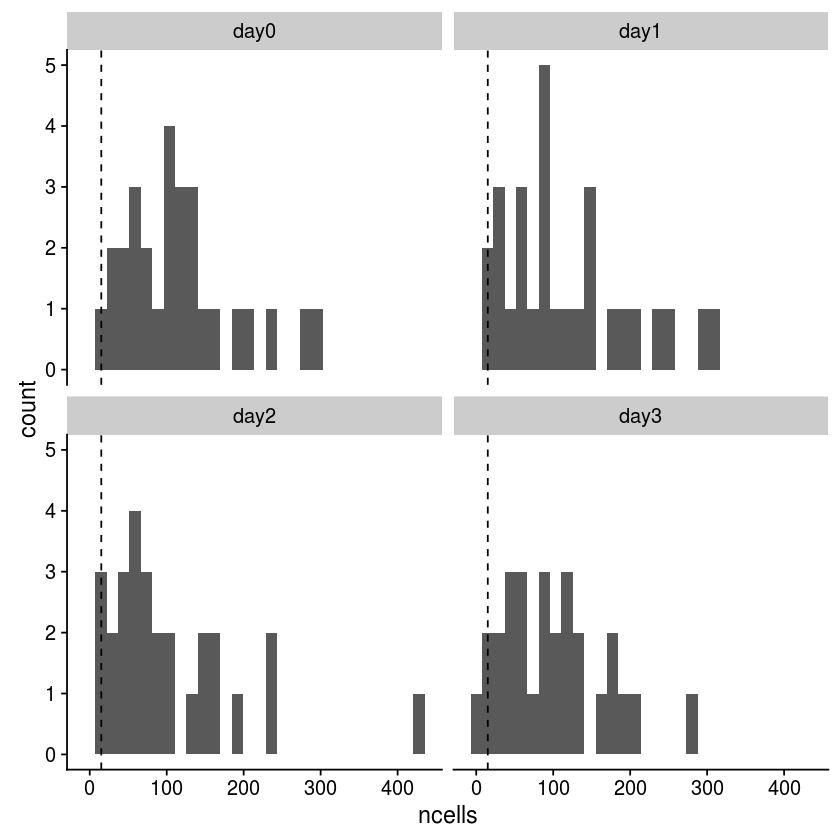

In [68]:
df_ncells <- as_data_frame(table(sce_filt$donor, sce_filt$day))
colnames(df_ncells) <- c("donor", "day", "ncells")
ggplot(df_ncells, aes(x = ncells)) +
    geom_histogram() +
    facet_wrap(~day) +
    geom_vline(xintercept = 15, linetype = 2)


There are `r colSums(tb >= 15)[1]` donors with at least 15 QC-passing day 0 cells.

There are `r colSums(tb >= 15)[2]` donors with at least 15 QC-passing Day 1 cells.

There are `r colSums(tb >= 15)[3]` donors with at least 15 QC-passing Day 2 cells.

There are `r colSums(tb >= 15)[4]` donors with at least 15 QC-passing Day 3 cells .

### Number of cells from each experiment and day that pass the QC



In [71]:
table(sce_filt$donor[sce_filt$experiment == "expt_28"], sce_filt$day[sce_filt$experiment == "expt_28"])
table(sce_filt$donor[sce_filt$experiment == "expt_29"], sce_filt$day[sce_filt$experiment == "expt_29"])
table(sce_filt$donor[sce_filt$experiment == "expt_32"], sce_filt$day[sce_filt$experiment == "expt_32"])
table(sce_filt$donor[sce_filt$experiment == "expt_33"], sce_filt$day[sce_filt$experiment == "expt_33"])
table(sce_filt$donor[sce_filt$experiment == "expt_34"], sce_filt$day[sce_filt$experiment == "expt_34"])
table(sce_filt$donor[sce_filt$experiment == "expt_35"], sce_filt$day[sce_filt$experiment == "expt_35"])

      
       day0 day1 day2 day3
  iiyk   94   70   30   15
  laey   27   26   20   24
  letw  233  229   99   68
  miaj   56   25   18   14
  poih  109  112  129   41
  rutc  107  111   60   46

      
       day0 day1 day2 day3
  aowh   73   91   93   86
  keui   40   17   39   38
  meue  137  154   54  106
  naah   62   85   58  130
  poih  100  134  301  152
  vils   37   55   45   55

      
       day0 day1 day2 day3
  guss   86  185   94   72
  lepk   20   12   13    2
  mita   35   95   51   37
  nocf   12   36   27   11
  oibg  104  290  155  140

      
       day0 day1 day2 day3
  datg   70   49   53   64
  feec   75   62   63  106
  guss  114   58   64  125
  nudd  108   43  108  131
  paab  119   46   69   55
  qorq  152   84  102  125

      
       day0 day1 day2 day3
  bokz  159  200  164  114
  datg  115   98   83   51
  guss   93   69   83   83
  nudd  178  153  123   76
  sehl  132  148  194  180

      
       day0 day1 day2 day3
  fejf   64   33   31   28
  nocf  119  138  117  164
  nufh   99   65   76   58
  wahn   97   99   79   88
  wigw  112  127  146  167
  zagm  121   83   90   82


Happily, all of the lines that we have sequenced (including monogenic diabetes lines) have genotype data available for our use.



In [72]:
cram2donor <- data.frame(cram_id = sce$sample_id, line_id = sce$donor)
## head(cram2donor)
write_tsv(cram2donor, path = "../../data_processed/merged/20180227/rep2_cram2donor.tsv")


All expression values were quantified using Salmon v0.8.2.

# Filter lowly-expressed genes

We keep genes with at least one count on average across all cells. We also drop feature control genes (ERCCs and MT genes).



In [ ]:
saveRDS(sce, "../../data_processed/merged/20180227/sce_merged_rep2_full_with_qc_labels.rds")


In [80]:
# cpm(sce_filt) <- scater::calculateCPM(sce_filt)
keep_gene <- (rowMeans(counts(sce_filt)) > 1)
keep_gene <- ((keep_gene | rownames(sce_filt) %in% diff_genes))
table(keep_gene)
sce_filt <- sce_filt[keep_gene,]
sce_filt
object_size(sce_filt)

keep_gene
FALSE  TRUE 
13496 11904 

class: SingleCellExperiment 
dim: 11904 12206 
metadata(1): log.exprs.offset
assays(3): tpm counts logcounts
rownames(11904): ENSG00000000003_TSPAN6 ENSG00000000419_DPM1 ...
  ENSG00000272398_CD24 ENSG00000273439_ZNF8
rowData names(52): exprs_collapsed_to ensembl_transcript_id ...
  log10_total_counts_control pct_counts_control
colnames(12206): 22606_2#10 22606_2#100 ... 24539_8#97 24539_8#98
colData names(122): salmon_version samp_type ... control_type
  cell_filter
reducedDimNames(0):
spikeNames(0):

3.51 GB


This filtering reduces the number of genes from ~20,000 to just ~10,000.

Now compute logcounts values for the object and save.



In [81]:
logcounts(sce_filt) <- log2(
    calculateCPM(sce_filt, use.size.factors = FALSE) + 1)
# saveRDS(sce_filt, file = "../../data_processed/merged/20180227/sce_merged_qc_filt_20180227.rds")
saveRDS(sce_filt, file = "../../data_processed/merged/20180227/sce_merged_qc_rep2_filt.rds")


# Normalization with *scran* size factors

We can compute the "sum factors" with *scran* and look at their distributions across experiments and days, especially in relation to the number of counts from endogenous features.



In [82]:
source("https://bioconductor.org/biocLite.R")
biocLite("scran")

Bioconductor version 3.6 (BiocInstaller 1.28.0), ?biocLite for help
A new version of Bioconductor is available after installing the most recent
  version of R; see http://bioconductor.org/install
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.6 (BiocInstaller 1.28.0), R 3.4.3 (2017-11-30).
Installing package(s) ‘scran’
Warning message in install.packages(pkgs = doing, lib = lib, ...):
“installation of package ‘scran’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Old packages: 'ape', 'bindrcpp', 'bit', 'broom', 'callr', 'caret', 'cluster',
  'CVST', 'data.table', 'DBI', 'ddalpha', 'devtools', 'dplyr', 'dtw',
  'foreign', 'Formula', 'fpc', 'futile.options', 'GGally', 'ggjoy', 'ggridges',
  'ggthemes', 'git2r', 'glmnet', 'htmlTable', 'htmlwidgets', 'httpuv', 'ica',
  'IRdisplay', 'irlba', 'kernlab', 'lambda.r', 'lubridate', 'maps', 'MASS',
  'Matrix', 'modelr', 'mvtnorm', 'nlme', 'NMF', 'pbapply', 'pbdZMQ', 'pillar',
  '

In [83]:
library(scran)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


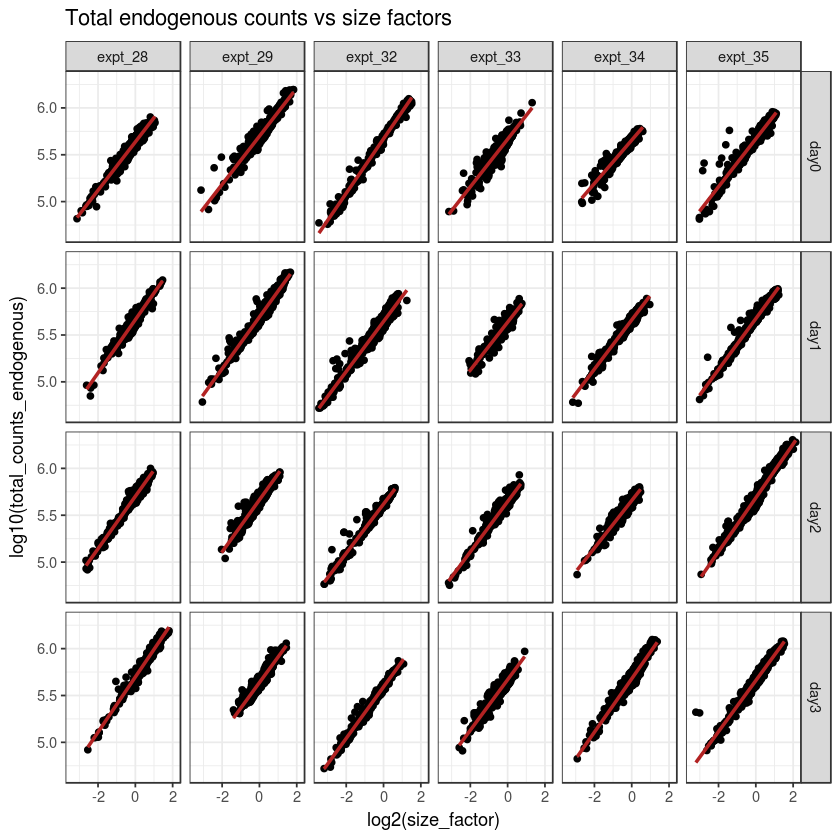

Picking joint bandwidth of 0.161


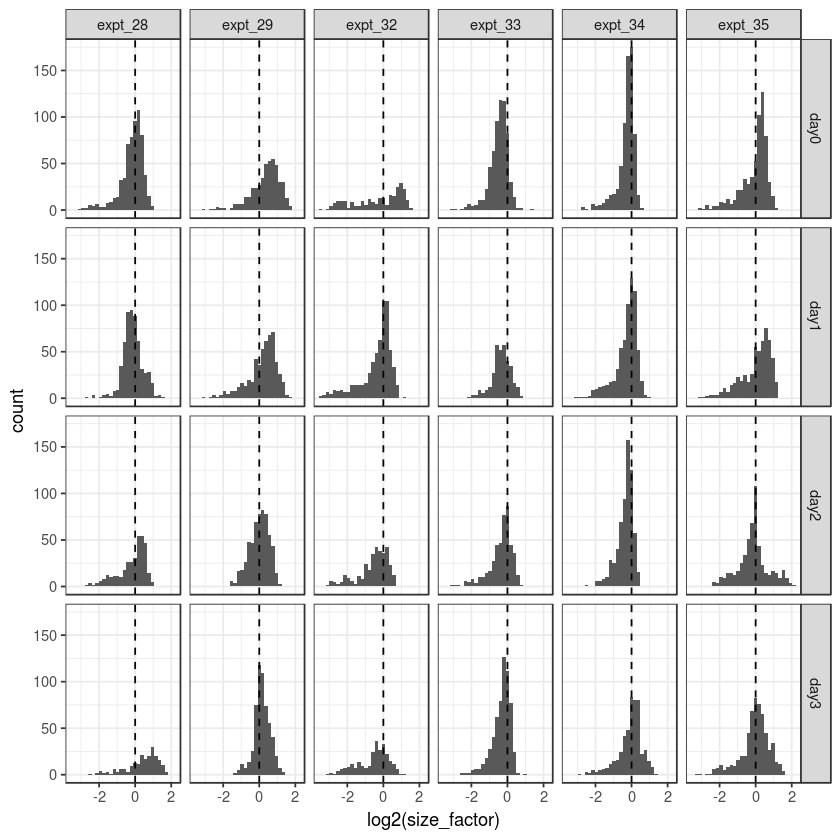

         
          FALSE
  expt_28  1763
  expt_29  2142
  expt_32  1477
  expt_33  2045
  expt_34  2496
  expt_35  2283

         
          FALSE
  expt_28  1763
  expt_29  2142
  expt_32  1477
  expt_33  2045
  expt_34  2496
  expt_35  2283

[1] 0

[1] 0

[1] 26

[1] 0.0021301

[1] 104

[1] 0.0085204

[1] 362

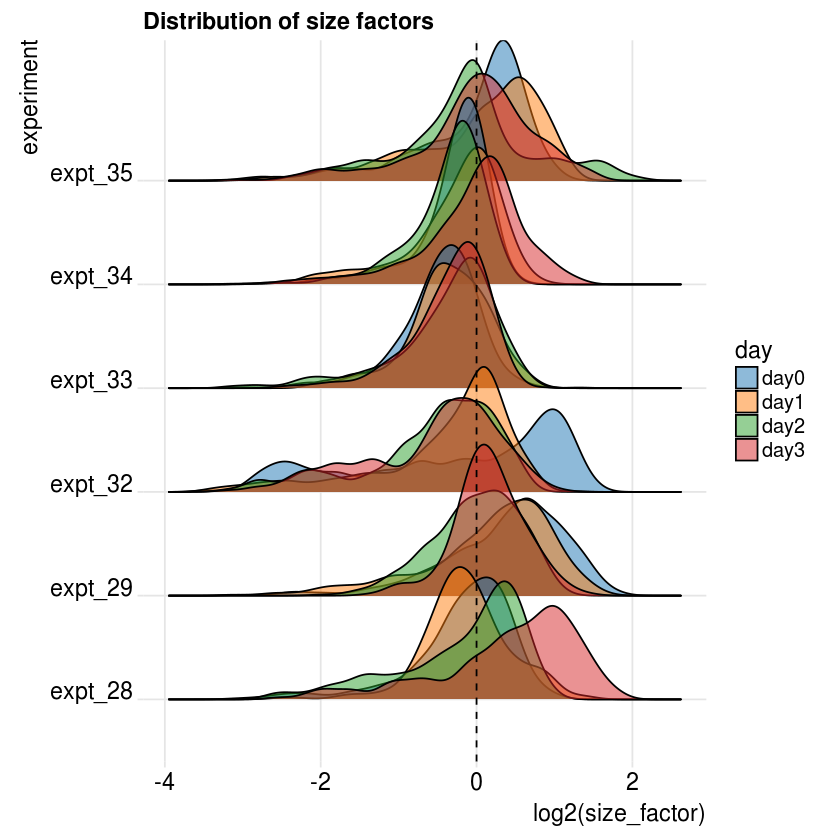

In [84]:
#sce_filt <- readRDS(file = "../../data_processed/merged/sce_merged_qc_filt.rds")
isSpike(sce_filt, "ERCC") <- grepl("^ERCC-", rownames(sce_filt))
clusters <- scran::quickCluster(sce_filt, min.size = 400, method = "igraph",
                         subset.row = sample(nrow(sce_filt), size = 3000))
sce_filt <- computeSumFactors(sce_filt, cluster = clusters)
#sce_filt <- computeSpikeFactors(sce_filt, general.use = FALSE)

sce_filt$size_factor <- sizeFactors(sce_filt)

colData(sce_filt) %>% as.data.frame %>%
    ggplot(aes(x = log2(size_factor), y = log10(total_counts_endogenous))) +
    geom_point() + geom_smooth(method = "lm", colour = "firebrick") +
    facet_grid(day ~ experiment) + theme_bw() +
    ggtitle("Total endogenous counts vs size factors")

colData(sce_filt) %>% as.data.frame %>%
    ggplot(aes(x = log2(size_factor))) +
    geom_histogram() + geom_vline(xintercept = 0, linetype = 2) +
    facet_grid(day ~ experiment) + theme_bw()

colData(sce_filt) %>% as.data.frame %>%
    ggplot(aes(x = log2(size_factor), y = experiment, fill = day)) +
    geom_density_ridges(alpha = 0.5) + geom_vline(xintercept = 0, linetype = 2) +
    theme_ridges() + ggtitle("Distribution of size factors") +
    scale_fill_tableau()

table(sce_filt$experiment, sizeFactors(sce_filt) < 0.05)

table(sce_filt$experiment, sizeFactors(sce_filt) > 20)

sum(sizeFactors(sce_filt) > 20 | sizeFactors(sce_filt) < 0.05)

mean(sizeFactors(sce_filt) > 20 | sizeFactors(sce_filt) < 0.05)

sum(sizeFactors(sce_filt) > 8 | sizeFactors(sce_filt) < 1 / 8)
mean(sizeFactors(sce_filt) > 8 | sizeFactors(sce_filt) < 1 / 8)
sum(sizeFactors(sce_filt) > 6 | sizeFactors(sce_filt) < 1 / 6)
mean(sizeFactors(sce_filt) > 6 | sizeFactors(sce_filt) < 1 / 6)
sum(sizeFactors(sce_filt) > 4 | sizeFactors(sce_filt) < 1 / 4)


We will remove another 1.5% of cells with size factors <0.125 or greater than 8.

Very high correlation between size factors and total counts from endogenous features (both on the log scale).



In [85]:
sce_filt <- sce_filt[, (sizeFactors(sce_filt) < 8 & sizeFactors(sce_filt) > 0.125)]

In [86]:
summary(sizeFactors(sce_filt))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1251  0.7088  0.9486  1.0019  1.2153  4.4009 


These look more reasonable now, so we will go with this set of cells and size factors.



In [87]:
dim(sce_filt)

[1] 11904 12180


Now normalize the expression data using these *scran* size factors.



In [88]:
sce_filt <- normalize(sce_filt)

Warning message in .local(object, ...):
“spike-in transcripts in 'ERCC' should have their own size factors”

In [89]:
## unique(which(is.na(exprs(sce_filt)), arr.ind = TRUE)[,2])
## length(unique(which(is.na(exprs(sce_filt)), arr.ind = TRUE)[,2]))

In [90]:
prle <- plotRLE(sce_filt[!rowData(sce_filt)$is_feature_control,],
                list(exprs = "exprs"), exprs_logged = TRUE,
                colour_by = "experiment", style = "minimal")

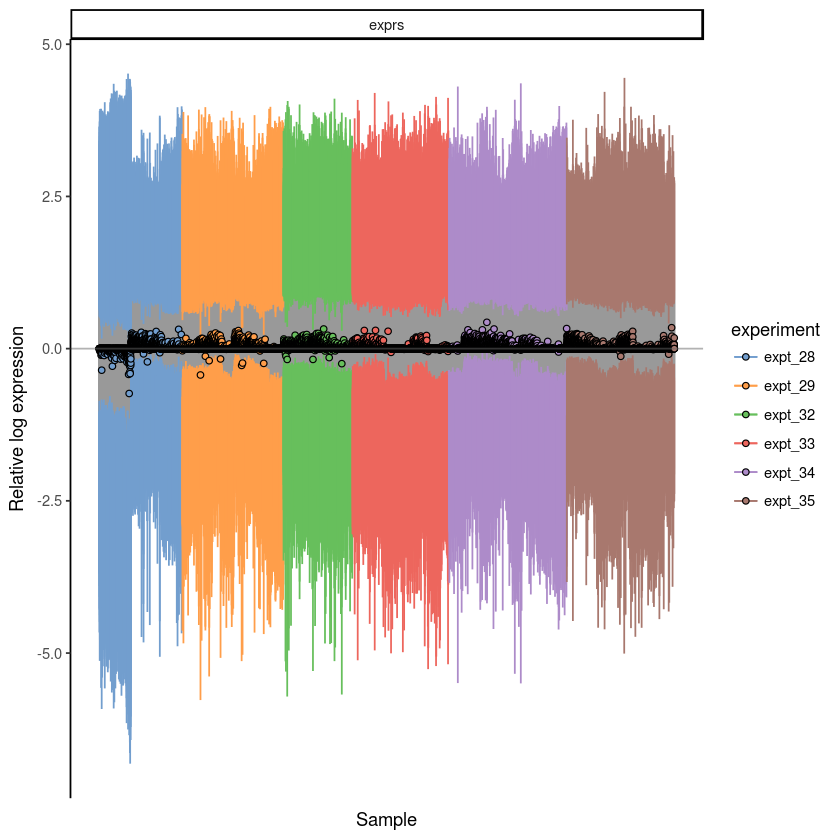

In [91]:
prle

In [92]:
#ggsave(filename = "../../figures/rle_plot_qc_merged_no_outliers_29to39_20180227.png", plot = prle, height = 9, width = 15)


![RLE plot without outliers](../../figures/rle_plot_qc_merged_no_outliers_20180227.png)



In [93]:
#saveRDS(sce_filt, file = "../../data_processed/merged/20180227/sce_merged_qc_filt_20180227.rds")
saveRDS(sce_filt, file = "../../data_processed/merged/20180227/sce_merged_qc_rep2_filt.rds")


# Identify highly variable genes



`geom_smooth()` using method = 'gam'


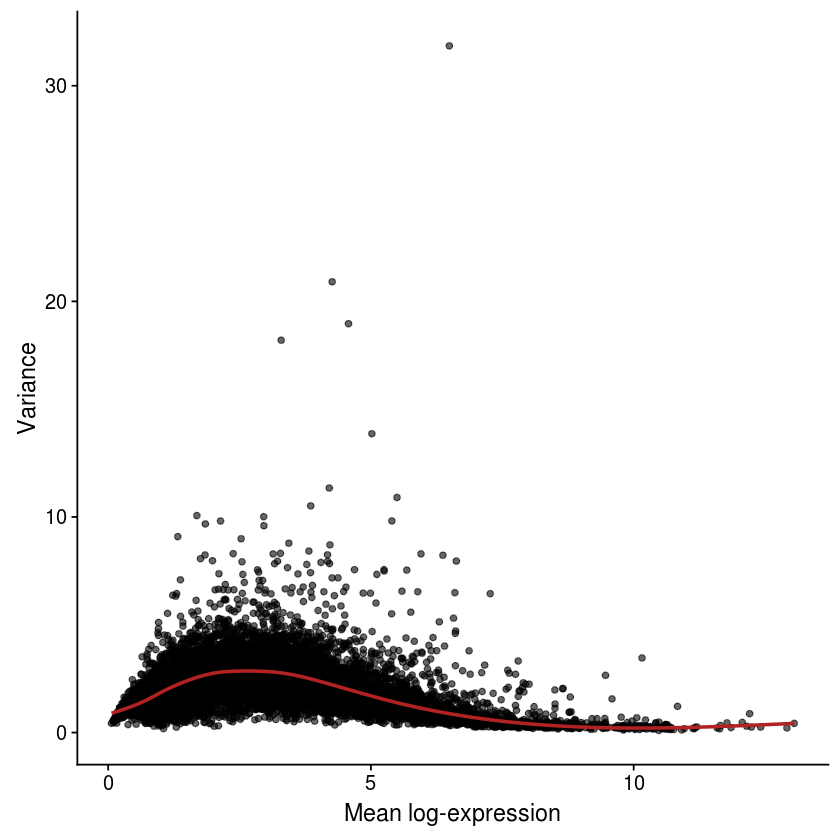

In [94]:
## sce_filt <- readRDS("../../data_processed/merged/sce_merged_qc_filt_20170829.rds")
design <- model.matrix(~experiment, data = colData(sce_filt))
alt.fit <- trendVar(sce_filt, design = design, use.spikes = FALSE)
alt.decomp <- decomposeVar(sce_filt, alt.fit)

data_frame(mean = alt.decomp$mean, total = alt.decomp$total,
           tech = alt.decomp$tech) %>%
    ggplot(aes(x = mean, y = total)) +
    geom_point(alpha = 0.6) +
    geom_smooth(aes(x = mean, y = tech), colour = "firebrick") +
    ylab("Variance") + xlab("Mean log-expression")


In [95]:
top.hvgs <- order(alt.decomp$bio, decreasing = TRUE)
head(alt.decomp[top.hvgs,])
dim(alt.decomp)
sum(alt.decomp$FDR < 0.05, na.rm = TRUE)
sum(alt.decomp$FDR < 0.01, na.rm = TRUE)
sum(alt.decomp$bio >= 0.1 * alt.decomp$tech)
hvgs <- rownames(alt.decomp[alt.decomp$FDR < 0.01,])
length(hvgs)
diff_genes[diff_genes %in% hvgs]

mean     total    bio       tech      p.value FDR
ENSG00000147869_CER1    6.492401 31.85000 30.992949 0.8570517 0       0  
ENSG00000158815_FGF17   4.263474 20.90949 18.673911 2.2355788 0       0  
ENSG00000095596_CYP26A1 4.573725 18.96324 16.957166 2.0060775 0       0  
ENSG00000104371_DKK4    3.293590 18.19643 15.441819 2.7546109 0       0  
ENSG00000185155_MIXL1   5.017588 13.86115 12.182056 1.6790922 0       0  
ENSG00000149591_TAGLN   5.496955 10.90472  9.545665 1.3590549 0       0

[1] 11904     6

[1] 4673

[1] 4579

[1] 3765

[1] 4579

[1] "ENSG00000111704_NANOG"  "ENSG00000204531_POU5F1" "ENSG00000181449_SOX2"  
 [4] "ENSG00000121570_DPPA4"  "ENSG00000164458_T"      "ENSG00000163508_EOMES" 
 [7] "ENSG00000185155_MIXL1"  "ENSG00000121966_CXCR4"  "ENSG00000136574_GATA4" 
[10] "ENSG00000141448_GATA6"  "ENSG00000164736_SOX17"  "ENSG00000133937_GSC"   
[13] "ENSG00000147869_CER1"   "ENSG00000132130_LHX1"   "ENSG00000152804_HHEX"

`geom_smooth()` using method = 'gam'


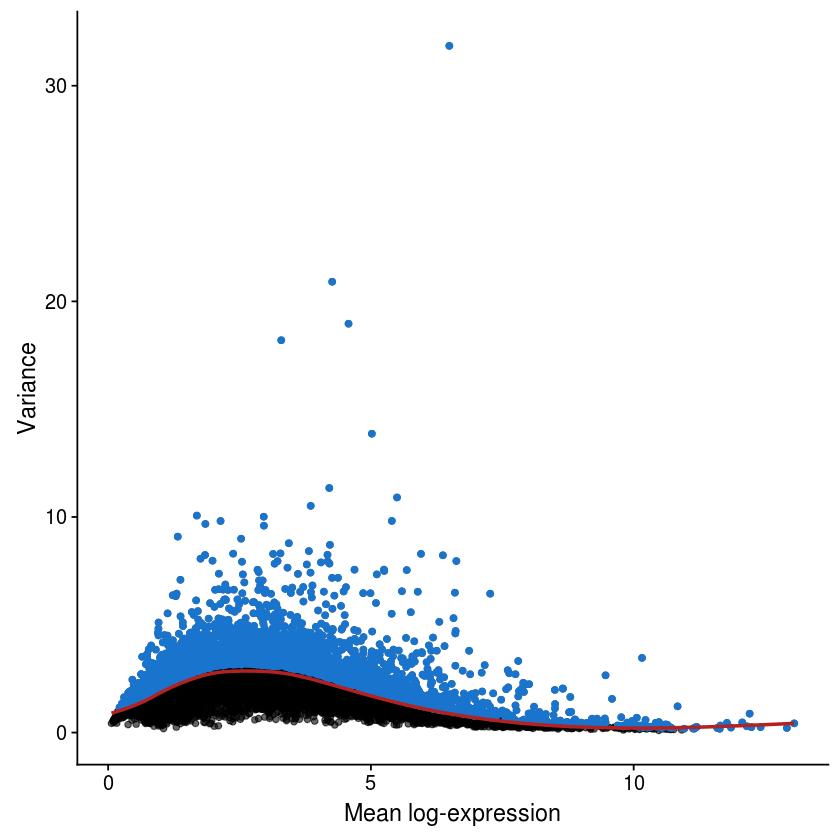

In [96]:
vardecomp <-  data_frame(mean = alt.decomp$mean, total = alt.decomp$total,
           tech = alt.decomp$tech, bio = alt.decomp$bio)
ggplot(vardecomp, aes(x = mean, y = total)) +
    geom_point(alpha = 0.6) +
    geom_point(aes(x = mean, y = total), colour = "dodgerblue3",
               data = dplyr::filter(vardecomp, bio >= 0.1 * tech)) +
    geom_smooth(aes(x = mean, y = tech), colour = "firebrick") +
    ylab("Variance") + xlab("Mean log-expression")

In [97]:
null.dist <- correlateNull(design = design) # fewer iterations can to speed it up.
# cor.genes <- correlatePairs(sce_filt[top.hvgs,], null.dist=null.dist, per.gene=TRUE)
# head(cor.genes)
cor.pairs <- correlatePairs(sce_filt[hvgs,], null.dist=null.dist, design=design)
head(cor.pairs)
g1 <- cor.pairs$gene1[cor.pairs$FDR < 0.05]
g2 <- cor.pairs$gene2[cor.pairs$FDR < 0.05]
high_cor_genes <- unique(c(g1, g2))

gene1                    gene2                    rho       p.value     
1 ENSG00000230903_RPL9P8   ENSG00000237550_UBE2Q2P6 0.9999253 1.999998e-06
2 ENSG00000182217_HIST2H4B ENSG00000183941_HIST2H4A 0.9263297 1.999998e-06
3 ENSG00000094755_GABRP    ENSG00000164265_SCGB3A2  0.9201476 1.999998e-06
4 ENSG00000134057_CCNB1    ENSG00000166851_PLK1     0.8543696 1.999998e-06
5 ENSG00000094755_GABRP    ENSG00000131969_ABHD12B  0.8450699 1.999998e-06
6 ENSG00000131747_TOP2A    ENSG00000175063_UBE2C    0.8428469 1.999998e-06
  FDR          limited
1 5.526604e-06 TRUE   
2 5.526604e-06 TRUE   
3 5.526604e-06 TRUE   
4 5.526604e-06 TRUE   
5 5.526604e-06 TRUE   
6 5.526604e-06 TRUE


Filter down to an object just containing the
`r length(intersect(high_cor_genes, hvgs))` highly-variable genes.



In [98]:
hvgs <- intersect(high_cor_genes, hvgs)
sce_hvg <- sce_filt[rownames(sce_filt) %in% c(hvgs, diff_genes),]

In [99]:
saveRDS(object = sce_hvg, file = "../../data_processed/merged/20180227/sce_merged_qc_rep2_hvg.rds")

rowData(sce_filt)$is_hvg <- rownames(sce_filt) %in% hvgs
#saveRDS(sce_filt, file = "../../data_processed/merged/20180227/sce_merged_qc_filt_20180227.rds")
saveRDS(sce_filt, file = "../../data_processed/merged/20180227/sce_merged_qc_rep2_filt.rds")

sce_hvg

mem_used()

# saveRDS(exprs(sce_hvg), "../../data_processed/merged/20180227/sce_merged_qc_hvg.exprs.rds")

# saveRDS(counts(sce_hvg), "../../data_processed/merged/20180227/sce_merged_qc_hvg.counts.rds")

# saveRDS(colData(sce_hvg), "../../data_processed/merged/20180227/sce_merged_qc_hvg.pdata.rds")

# saveRDS(rowData(sce_hvg), "../../data_processed/merged/20180227/sce_merged_qc_hvg.fdata.rds")

# saveRDS(sce_hvg[, sce_hvg$day == "day0"], "../../data_processed/merged/20180227/sce_merged_qc_hvg_day0.rds")

# saveRDS(sce_hvg[, sce_hvg$day == "day1"], "../../data_processed/merged/20180227/sce_merged_qc_hvg_day1.rds")

# saveRDS(sce_hvg[, sce_hvg$day %in% c("day2", "day3")], "../../data_processed/merged/20180227/sce_merged_qc_hvg_day2-3.rds")

# saveRDS(sce_filt[rownames(sce_filt) %in% c(high_cor_genes, diff_genes), sce_filt$cell_filter], "../../data_processed/merged/20180227/sce_merged_strict_qc_hvg.rds")

class: SingleCellExperiment 
dim: 4582 12180 
metadata(1): log.exprs.offset
assays(3): tpm counts logcounts
rownames(4582): ENSG00000000419_DPM1 ENSG00000001626_CFTR ...
  ENSG00000271043_MTRNR2L2 ENSG00000272398_CD24
rowData names(52): exprs_collapsed_to ensembl_transcript_id ...
  log10_total_counts_control pct_counts_control
colnames(12180): 22606_2#10 22606_2#100 ... 24539_8#97 24539_8#98
colData names(123): salmon_version samp_type ... cell_filter
  size_factor
reducedDimNames(0):
spikeNames(1): ERCC

14.3 GB


Save datasets for QTL analysis (keeping donors with >=15 cells passing QC).



In [ ]:
# tb <- table(sce_hvg$donor, sce_hvg$day)
# donors_day0 <- rownames(tb)[tb[, "day0"] >= 15]
# write_tsv(data_frame(donor = sort(rownames(tb)[tb[, "day0"] >= 15])),
#           path = "../../qtls/day0_donors_20180227.tsv",
#           col_names = FALSE)
# donors_day1 <- rownames(tb)[tb[, "day1"] >= 15]
# donors_day2 <- rownames(tb)[tb[, "day2"] >= 15]
# donors_day3 <- rownames(tb)[tb[, "day3"] >= 15]
# donors_alldays <- rownames(tb)[rowSums(tb) >= 50]

# saveRDS(sce_hvg[, (sce_hvg$day == "day0" & sce_hvg$donor %in% donors_day0)],
#         "../../data_processed/merged/20180227/sce_merged_qc_hvg_day0_for_qtl.rds")

# saveRDS(sce_hvg[, (sce_hvg$day == "day1" & sce_hvg$donor %in% donors_day1)],
#         "../../data_processed/merged/20180227/sce_merged_qc_hvg_day1_for_qtl.rds")

# saveRDS(sce_hvg[, (sce_hvg$day == "day2" & sce_hvg$donor %in% donors_day2)],
#         "../../data_processed/merged/20180227/sce_merged_qc_hvg_day2_for_qtl.rds")

# saveRDS(sce_hvg[, (sce_hvg$day == "day3" & sce_hvg$donor %in% donors_day3)],
#         "../../data_processed/merged/20180227/sce_merged_qc_hvg_day3_for_qtl.rds")


# saveRDS(sce_hvg[, (sce_hvg$donor %in% donors_alldays)],
#         "../../data_processed/merged/20180227/sce_merged_qc_hvg_alldays_for_qtl.rds")





# Visualize filtered dataset

We take a look at the normalized, filtered dataset using some common dimension reduction techniques (PCA, diffusion maps, t-SNE).

## RLE plot



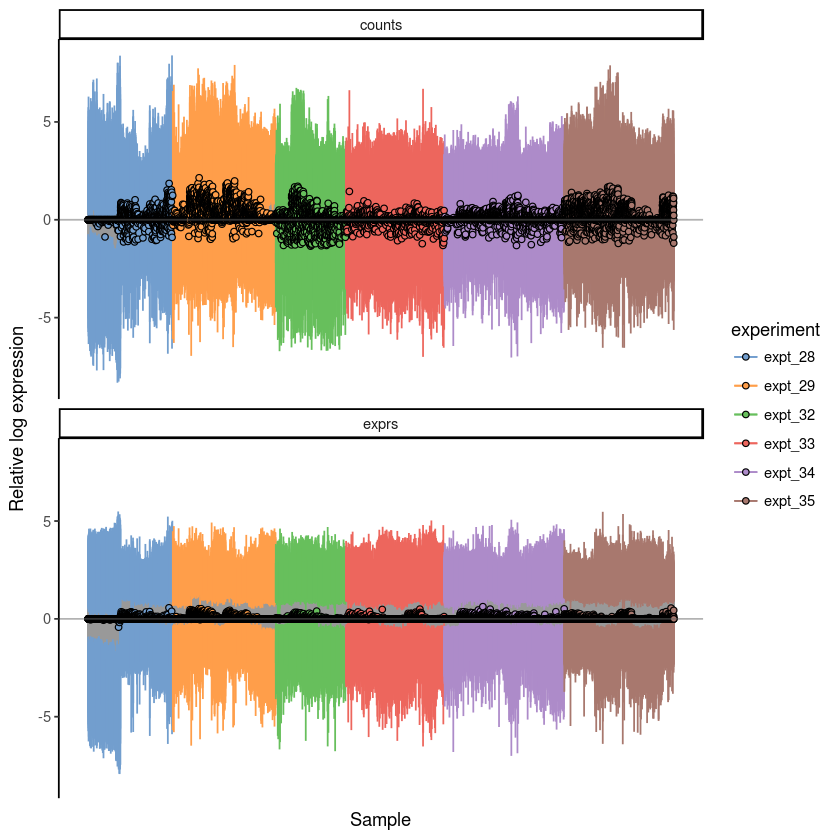

In [100]:
prle <- plotRLE(sce_hvg, list(counts = "counts", exprs = "exprs"),
                exprs_logged = c(FALSE, TRUE),
                colour_by = "experiment", style = "minimal")
prle


## PCA plots

We can show overall structure amongst QC cells with simple PCA plots.



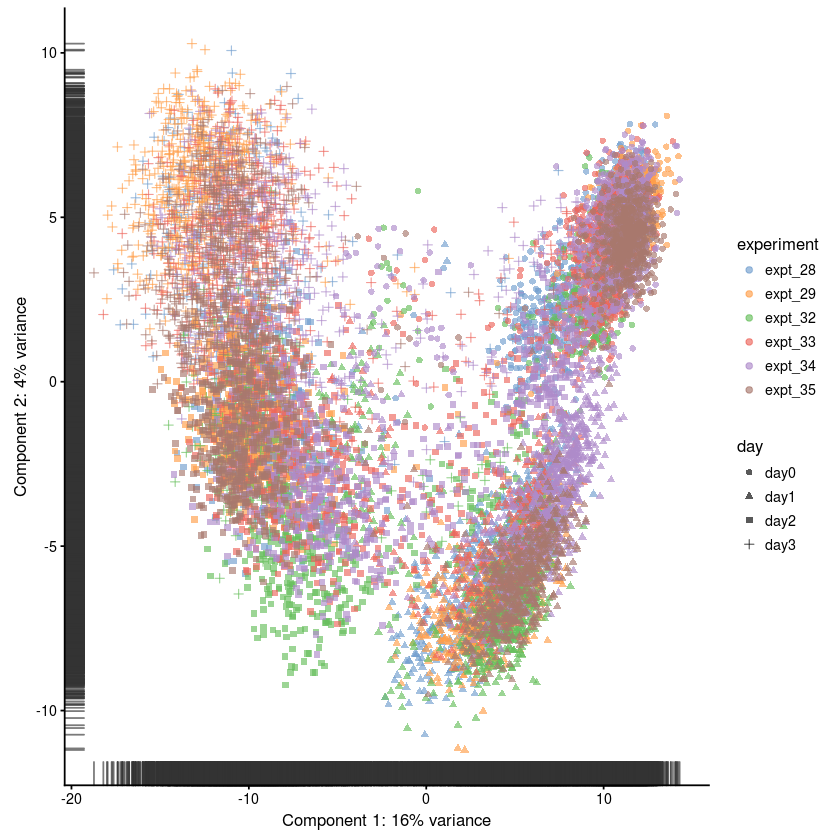

In [101]:
sce_hvg <- plotPCA(sce_hvg, colour_by = "experiment", shape_by = "day",
                   return_SCE = TRUE, ncomponents = 2, draw_plot = TRUE)

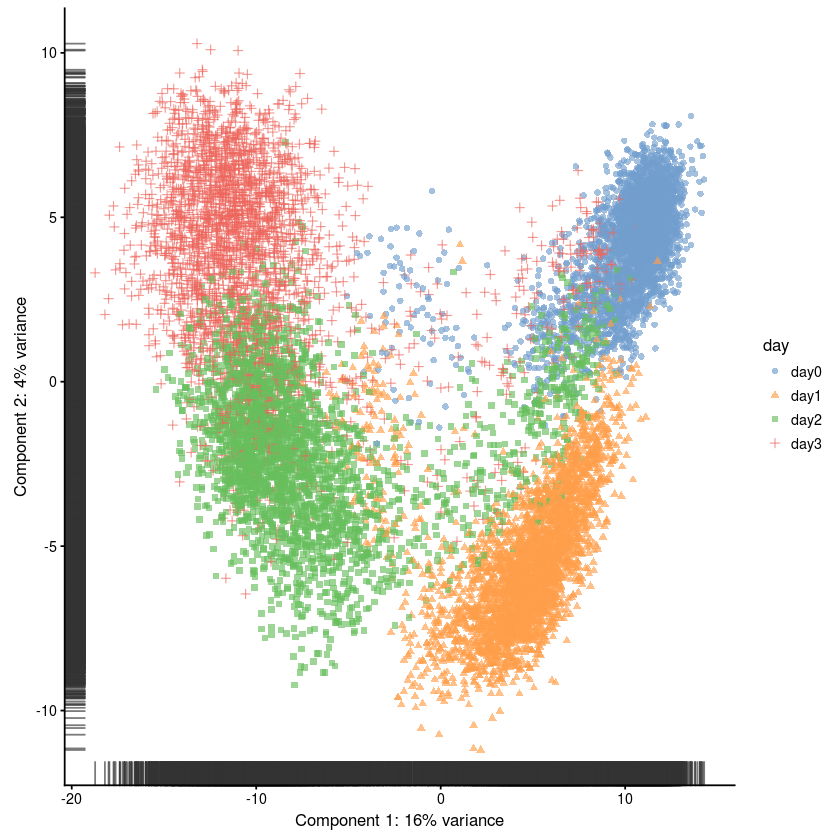

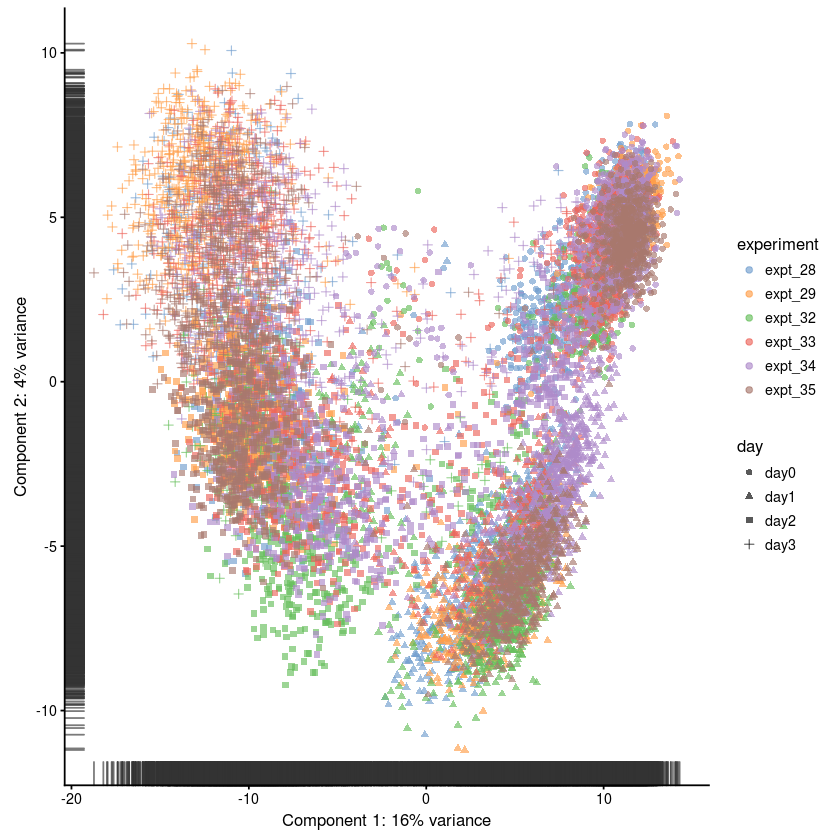

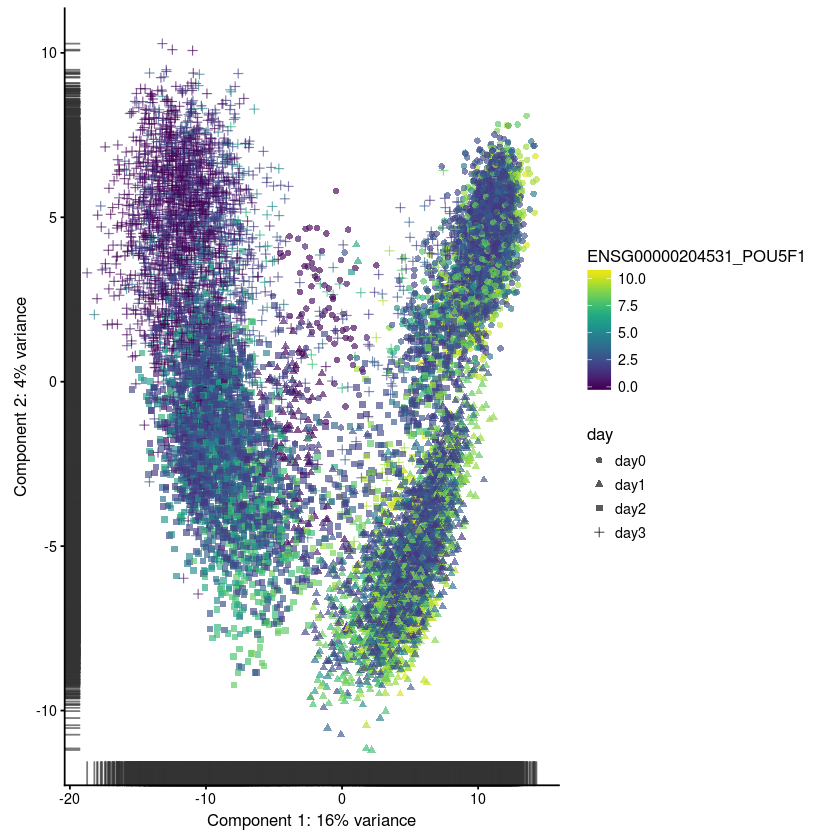

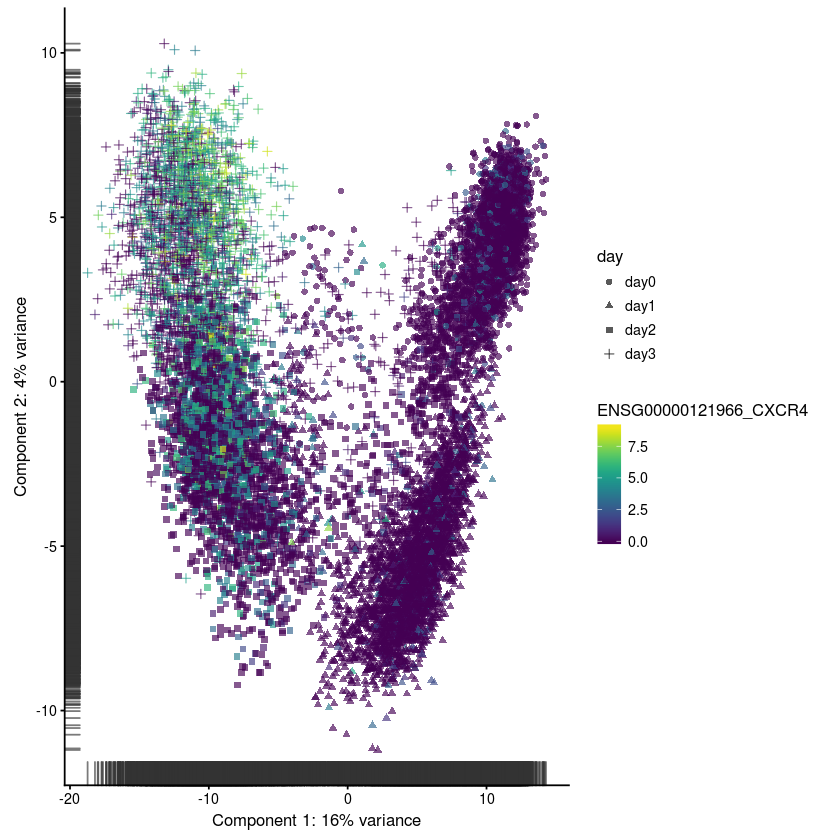

In [102]:

plotReducedDim(sce_hvg, use_dimred = "PCA", colour_by = "day", shape_by = "day")
plotReducedDim(sce_hvg, use_dimred = "PCA", colour_by = "experiment", shape_by = "day")
plotReducedDim(sce_hvg, use_dimred = "PCA",
               colour_by = "ENSG00000204531_POU5F1", shape_by = "day")
plotReducedDim(sce_hvg, use_dimred = "PCA",
               colour_by = "ENSG00000121966_CXCR4", shape_by = "day")






# Session Info



In [ ]:
sessionInfo()